## Faza 1.: Definicja problemu

## Faza 2.: Zebranie danych

In [95]:
! pip install pandas matplotlib seaborn fuzzywuzzy

In [96]:
import pandas as pd

pd.set_option("display.max_columns", None)

csv_files = [
    "data/2016-ISR.csv",
    "data/2017-ISR.csv",
    "data/2018-ISR.csv",
    "data/2019-ISR.csv",
    "data/2020-ISR.csv",
    "data/2021-ISR.csv",
    "data/2022-ISR.csv",
    "data/2023-ISR.csv",
    "data/2024-ISR.csv",
]
csv_files_short = ["data/sampled_ISR.csv"]  # 10% losowych rekordów z każdego pliku

df = pd.concat((pd.read_csv(file, low_memory=False) for file in csv_files_short), ignore_index=True)

df

,CONTACT_CARD_ID,CONTACT_TYPE_CD,CARD_NO,CONTACT_DATE,CONTACT_HOUR,SUBMITTING_BEAT_CD,JUVENILE_I,CLOTHING_DESCR,NAME_VERIFIED_I,RD_NO,HOTSPOT_NO,EVENT_NO,MISSION_NO,CPD_UNIT_NO,CREATED_BY,CREATED_DATE,MODIFIED_BY,MODIFIED_DATE,AGE,AGE_TO,SEX_CODE_CD,RACE_CODE_CD,HEIGHT,WEIGHT,BUILD_CODE_CD,EYE_COLOR_CODE_CD,HAIR_COLOR_CODE_CD,HAIR_STYLE_CODE_CD,COMPLEXION_CODE_CD,STREET_NO,STREET_DIRECTION_CD,STREET_NME,CITY,STATE_CD,ZIP_CD,DISTRICT,SECTOR,BEAT,AREA,WARD,RES_DISTRICT,RES_SECTOR,RES_BEAT,RES_AREA,RES_WARD,BUS_DISTRICT,BUS_SECTOR,BUS_BEAT,BUS_AREA,BUS_WARD,SUBMITTING_UNIT,CONTACT_TYPE_DESCR,V_YEAR,MAKE_CD,MAKE_DESCR,STYLE_CD,STYLE_DESCR,TYPE_CD,MODEL_DESCR,COLOR_TOP,COLOR_BOTTOM,FO_EMPLOYEE_ID,SO_EMPLOYEE_ID,SUPV_EMPLOYEE_ID,GANG,KNOWN_HANGOUT,FACTION_NAME,CONTACT_CARD_STATUS_CD,COMPLETION_I,LOCATION_CD,HANDCUFFED_I,VEHICLE_INVOLVED_I,DISPERSAL_TIME,NUMBER_OF_PERSONS_DISPERSED,GANG_LOOKOUT_I,GANG_SECURITY_I,INTIMIDATION_I,SUSPECT_NARCOTIC_ACTIVITY_I,ENFORCEMENT_ACTION_TAKEN_I,INDICATIVE_DRUG_TRANSACTION_I,INDICATIVE_CASING_I,FITS_DESCRIPTION_I,PROXIMITY_TO_CRIME_I,FITS_DESCRIPTION_OFFENDER_I,GANG_NARCOTIC_RELATED_I,OTHER_FACTOR_I,PAT_DOWN_I,PAT_DOWN_CONSENT_I,PAT_DOWN_RECEIPT_GIVEN_I,VERBAL_THREATS_I,KNOWLEDGE_OF_PRIOR_I,ACTIONS_INDICATIVE_VIOLENCE_I,VIOLENT_CRIME_I,SUSPICIOUS_OBJECT_I,OTHER_REASONABLE_SUSPICION_I,WEAPON_OR_CONTRABAND_FOUND_I,FIREARM_I,COCAINE_I,COCAINE_AMOUNT,HEROIN_I,HEROIN_AMOUNT,OTHER_CONTRABAND_I,OTHER_CONTRABAND_DESCR,OTHER_WEAPON_I,OTHER_WEAPON_DESCR,CANNABIS_I,CANNABIS_AMOUNT,OTHER_CON_SUB_I,OTHER_CON_SUB,OTHER_CON_SUB_AMT,SEARCH_I,SEARCH_CONSENT_I,SEARCH_CONTRABAND_FOUND_I,SEARCH_FIREARM_I,SEARCH_COCAINE_I,SEARCH_COCAINE_AMOUNT,SEARCH_HEROIN_I,SEARCH_HEROIN_AMOUNT,SEARCH_OTHER_CONTRABAND_I,SEARCH_OTHER_CONTRABAND_DESCR,SEARCH_OTHER_WEAPON_I,SEARCH_OTHER_WEAPON_DESCR,SEARCH_CANNABIS_I,SEARCH_CANNABIS_AMOUNT,SEARCH_OTHER_CON_SUB_I,SEARCH_OTHER_CON_SUB_DESCR,SEARCH_OTHER_CON_SUB_AMT,EVENT_ASSIGNEED_BY_CD,BODY_CAMERA_I,CAR_CAMERA_I,VEHICLE_STOPPED_I,INFORMATION_REFUSED_I,FACIAL_HAIR_CD,GANG_OTHER_I,ENFORCEMENT_TYPE_CD,ENFORCEMENT_ID_NO,CITED_VIOLATIONS_CD,CANNABIS_INVENTORY_NO,COCAINE_INVENTORY_NO,HEROIN_INVENTORY_NO,OTHER_CON_SUB_INVENTORY_NO,FIREARM_INVENTORY_NO,OTHER_WEAPON_INVENTORY_NO,ALCOHOL_I,ALCOHOL_INVENTORY_NO,PARA_I,PARA_INVENTORY_NO,STOLEN_PROPERTY_I,STOLEN_PROPERTY_INVENTORY_NO,SEARCH_PROPERTY_I,S_CANNABIS_INVENTORY_NO,S_COCAINE_INVENTORY_NO,S_HEROIN_INVENTORY_NO,S_OTHER_CON_SUB_INVENTORY_NO,S_FIREARM_INVENTORY_NO,S_OTHER_WEAPON_INVENTORY_NO,S_ALCOHOL_I,S_ALCOHOL_INVENTORY_NO,S_PARA_I,S_PARA_INVENTORY_NO,S_STOLEN_PROPERTY_I,S_STOLEN_PROPERTY_INVENTORY_NO,GANG_OTHER,OTHER_DESCR,OTHER_INVENTORY_NO,S_OTHER_I,S_OTHER_DESCR,S_OTHER_INVENTORY_NO,NAME
0,20011719,INVSTG,ISR000011719,01-JAN-2016 00:02,0,1561D,N,UNK,NaN,HZ100007,NaN,00059,NaN,15,772760,01-JAN-2016 01:45,772760.0,01-JAN-2016 03:11,28.0,NaN,M,BLK,601,221,MED,BRO,BLK,SHORT,DBR,6XX,N,LOTUS AVE,CHICAGO,IL,60644.0,15,152,1524,3,NaN,11.0,112.0,1125.0,3,NaN,NaN,NaN,NaN,0,NaN,15,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,772760,NaN,478605,NaN,NaN,UNKNOWN FACTION,APP,Y,291,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,Y,Y,NaN,NaN,Y,Y,NaN,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VIEW,N,N,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BLACK P STONES
1,20011722,INVSTG,ISR000011722,01-JAN-2016 00:55,0,1963C,N,SHIRT AND JEANS,Y,NaN,NaN,00778,NaN,19,186503,01-JAN-2016 01:50,186503.0,04-JAN-2016 17:32,27.0,NaN,M,BLK,510,192,MED,BRO,BLK,SHORT,MED,8XX,W,ADDISON ST,CHICAGO,IL,60613.0,19,192,1924,3,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,19,Investigatory Stop,NaN,PONT,PONTIAC,4T,HARDTOP (4-DOOR),NaN,GRAND AM,GRY,GRY,186503,NaN,398950,NaN,NaN,100TH & DAUPHIN,APP,Y,220,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,Y,Y,NaN,NaN,NaN,Y,NaN,NaN,N,

## Faza 3.: Ocena przydatności danych

In [97]:
pd.set_option("display.max_info_columns", 200)

df_cp = df.copy()

df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89504 entries, 0 to 89503
Data columns (total 169 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    CONTACT_CARD_ID                 89504 non-null  int64  
 1    CONTACT_TYPE_CD                 89504 non-null  object 
 2    CARD_NO                         89504 non-null  object 
 3    CONTACT_DATE                    89504 non-null  object 
 4    CONTACT_HOUR                    89504 non-null  int64  
 5    SUBMITTING_BEAT_CD              89504 non-null  object 
 6    JUVENILE_I                      89504 non-null  object 
 7    CLOTHING_DESCR                  89311 non-null  object 
 8    NAME_VERIFIED_I                 39983 non-null  object 
 9    RD_NO                           12263 non-null  object 
 10   HOTSPOT_NO                      2880 non-null   object 
 11   EVENT_NO                        89501 non-null  object 
 12   MISSION_NO      

In [98]:
df_cp.describe()

,CONTACT_CARD_ID,CONTACT_HOUR,CPD_UNIT_NO,CREATED_BY,MODIFIED_BY,AGE,AGE_TO,ZIP_CD,DISTRICT,SECTOR,BEAT,AREA,WARD,RES_DISTRICT,RES_SECTOR,RES_BEAT,RES_AREA,RES_WARD,BUS_DISTRICT,BUS_SECTOR,BUS_BEAT,BUS_AREA,BUS_WARD,SUBMITTING_UNIT,V_YEAR,TYPE_CD,FO_EMPLOYEE_ID,SO_EMPLOYEE_ID,SUPV_EMPLOYEE_ID,DISPERSAL_TIME,NUMBER_OF_PERSONS_DISPERSED,OTHER_CONTRABAND_I,OTHER_CONTRABAND_DESCR,SEARCH_OTHER_CONTRABAND_I,SEARCH_OTHER_CONTRABAND_DESCR,FACIAL_HAIR_CD,CITED_VIOLATIONS_CD,CANNABIS_INVENTORY_NO,COCAINE_INVENTORY_NO,HEROIN_INVENTORY_NO,OTHER_CON_SUB_INVENTORY_NO,ALCOHOL_INVENTORY_NO,PARA_INVENTORY_NO,STOLEN_PROPERTY_INVENTORY_NO,S_COCAINE_INVENTORY_NO,S_HEROIN_INVENTORY_NO,S_OTHER_CON_SUB_INVENTORY_NO,S_FIREARM_INVENTORY_NO,S_OTHER_WEAPON_INVENTORY_NO,S_PARA_INVENTORY_NO
count,8.950400e+04,89504.000000,89504.000000,89504.000000,63478.000000,89010.000000,1688.000000,8.935600e+04,89504.000000,89504.000000,89504.000000,89504.000000,0.0,87962.000000,87962.000000,87962.000000,89504.000000,0.0,550.000000,550.000000,550.000000,89504.000000,0.0,89504.000000,36509.000000,0.0,89504.000000,74097.000000,89504.000000,3274.000000,3273.000000,0.0,0.0,0.0,0.0,89504.000000,0.0,7.000000e+00,2.000000e+00,3.000000e+00,2.000000e+00,1.0,0.0,0.0,7.000000e+00,1.200000e+01,5.000000e+00,8.000000e+00,2.000000e+00,3.000000e+00
mean,2.806738e+07,14.697008,68.446438,494127.691511,495713.390939,31.256814,33.261256,1.963285e+05,10.968784,111.732492,1120.009676,2.060422,NaN,14.588868,147.577738,1478.038653,1.669937,NaN,15.918182,160.947273,1611.636364,0.010301,NaN,68.446438,2008.719959,NaN,494056.594733,504389.998583,484270.021608,1577.910507,2.518485,NaN,NaN,NaN,NaN,3.723353,NaN,1.362025e+07,1.363236e+07,1.361617e+07,1.362577e+07,13610511.0,NaN,NaN,1.361556e+07,1.361128e+07,1.361877e+07,1.361869e+07,1.361453e+07,1.361510e+07
std,9.798379e+06,6.567029,152.853216,284932.019438,285769.910378,13.717605,19.534533,2.868296e+07,6.792209,68.007568,680.133278,0.951767,NaN,10.618869,105.607787,1055.273198,1.162838,NaN,11.134655,110.774418,1107.047544,0.161986,NaN,152.853216,8.684642,NaN,284850.670250,287021.227896,287599.318412,479.833597,2.189043,NaN,NaN,NaN,NaN,4.328635,NaN,1.516464e+04,5.303301e+01,8.051708e+03,3.400477e+03,NaN,NaN,NaN,8.622074e+03,9.463851e+03,1.371935e+04,9.051141e+03,1.442498e+03,1.476231e+04
min,2.001172e+07,0.000000,1.000000,67.000000,67.000000,0.000000,0.000000,6.007000e+03,1.000000,11.000000,111.000000,0.000000,NaN,1.000000,11.000000,111.000000,0.000000,NaN,1.000000,11.000000,111.000000,0.000000,NaN,1.000000,1874.000000,NaN,67.000000,67.000000,740.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,1.360337e+07,1.363232e+07,1.360953e+07,1.362337e+07,13610511.0,NaN,NaN,1.360547e+07,1.360270e+07,1.360230e+07,1.360445e+07,1.361351e+07,1.360119e+07
25%,2.042399e+07,11.000000,6.000000,247578.000000,248233.000000,21.000000,23.000000,6.061900e+04,6.000000,62.000000,621.000000,1.000000,NaN,7.000000,71.000000,712.000000,1.000000,NaN,8.000000,82.000000,821.000000,0.000000,NaN,6.000000,2004.000000,NaN,247531.000000,253788.000000,226592.000000,1248.000000,1.000000,NaN,NaN,NaN,NaN,0.000000,NaN,1.360485e+07,1.363234e+07,1.361169e+07,1.362457e+07,13610511.0,NaN,NaN,1.360934e+07,1.360570e+07,1.360542e+07,1.361416e+07,1.361402e+07,1.360735e+07
50%,2.271426e+07,16.000000,11.000000,497717.000000,499197.000000,27.000000,30.000000,6.062600e+04,10.000000,101.000000,1011.000000,2.000000,NaN,11.000000,111.000000,1115.000000,2.000000,NaN,15.000000,151.500000,1516.500000,0.000000,NaN,11.000000,2008.000000,NaN,497717.000000,506355.000000,478605.000000,1614.500000,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,1.362674e+07,1.363236e+07,1.361385e+07,1.362577e+07,13610511.0,NaN,NaN,1.361674e+07,1.360859e+07,1.362681e+07,1.361695e+07,1.361453e+07,1.361351e+07
75%,3.504673e+07,20.000000,24.000000,741314.000000,742961.000000,39.000000,40.000000,6.064000e+04,15.000000,153.000000,1533.000000,3.000000,NaN,24.000000,241.000000,2411.000000,3.000000,NaN,22.000000,222.000000,2222.000000,0.000000,

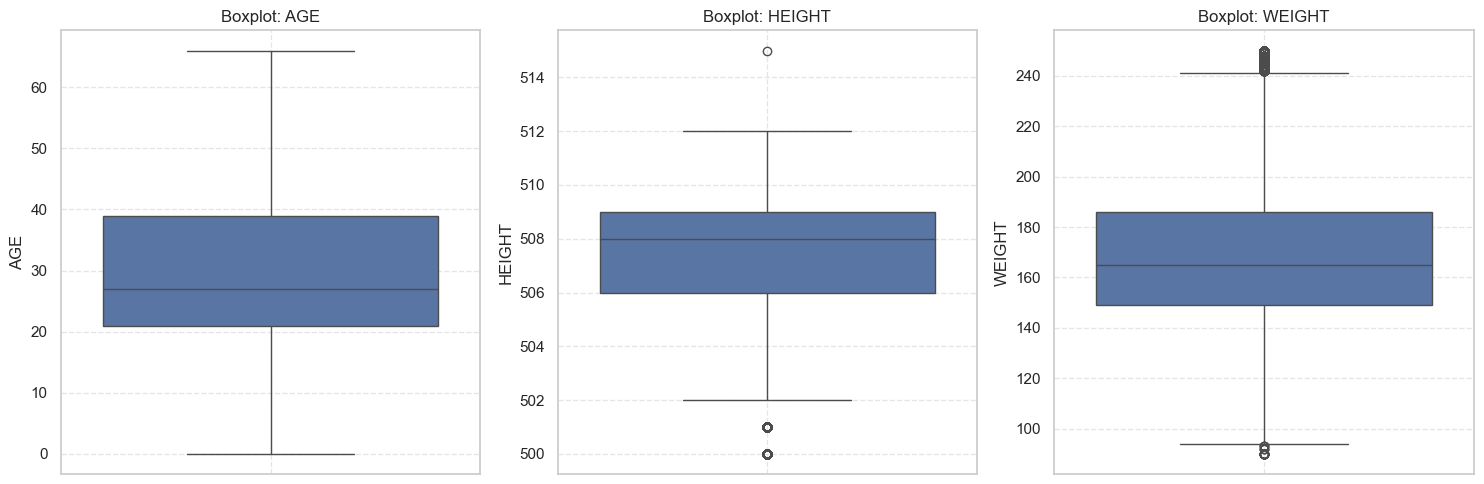

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ["AGE", "HEIGHT", "WEIGHT"]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(cols):
    data = pd.to_numeric(df_cp[col], errors="coerce").dropna()
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data_filtered = data[(data >= lower_bound) & (data <= upper_bound)]

    sns.boxplot(y=data_filtered, ax=axes[i])
    axes[i].set_title(f"Boxplot: {col}")
    axes[i].set_ylabel(col)
    axes[i].grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.style.use("default")
sns.set_theme(style="whitegrid")
plt.show()

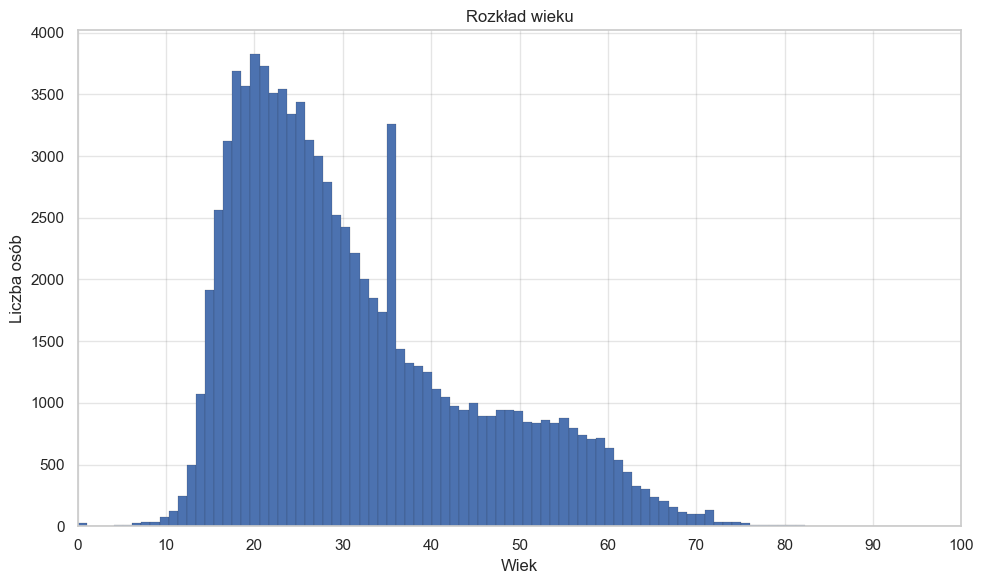

In [100]:
plt.figure(figsize=(10, 6))

plt.hist(df_cp["AGE"].dropna(), bins=800, edgecolor="k", linewidth=0.1)

plt.title("Rozkład wieku")
plt.xlabel("Wiek")
plt.ylabel("Liczba osób")

plt.xlim(0, 100)
plt.xticks(range(0, 101, 10))

plt.grid(True, which="both", axis="both", color="gray", alpha=0.2)

plt.tight_layout()
plt.show()

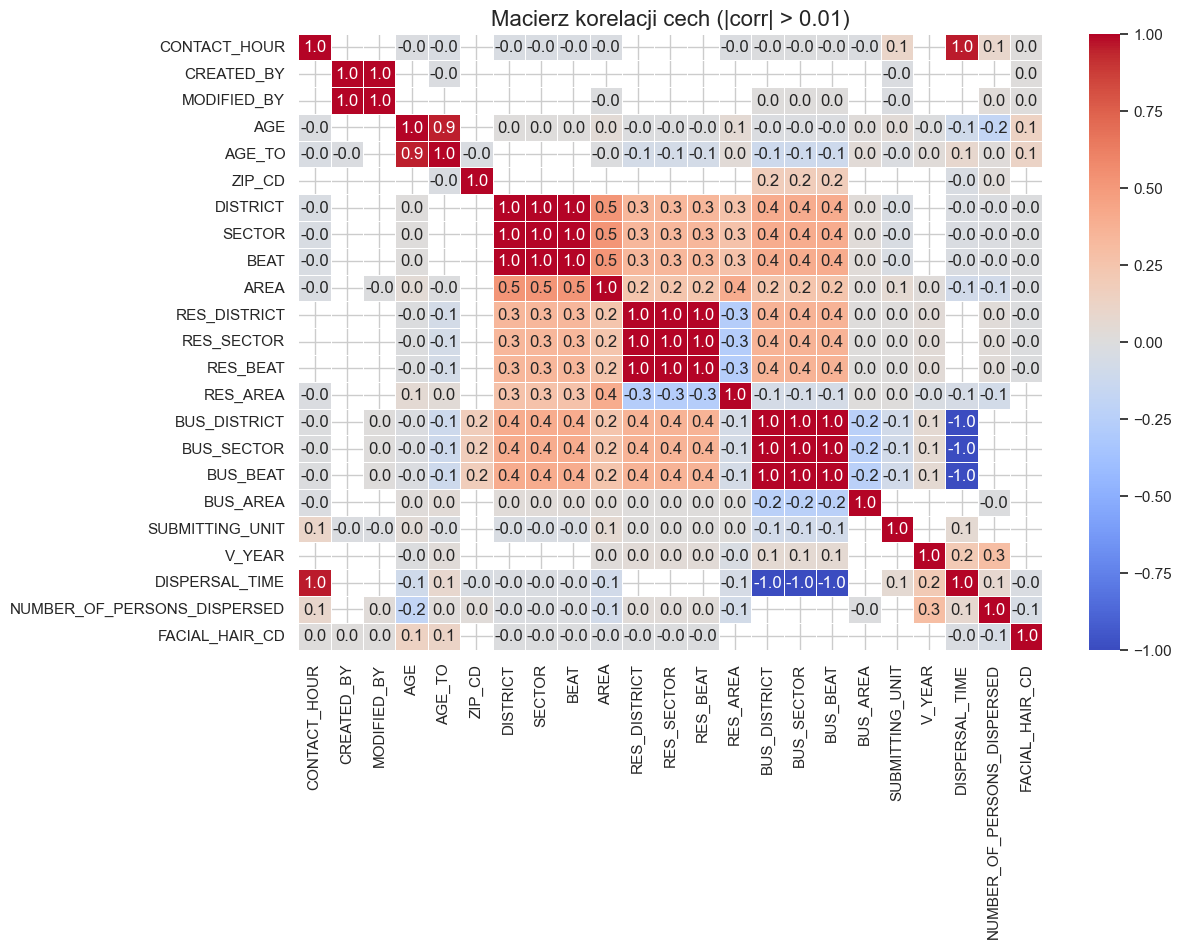

In [101]:
numerical_columns = df_cp.select_dtypes(include=["number"]).columns

numerical_columns = [
    col for col in numerical_columns
    if not col.lower().endswith("_id")
       and not col.lower().endswith("_no")
]

corr_matrix = df_cp[numerical_columns].corr()

threshold = 0.01
high_corr = corr_matrix[(corr_matrix > threshold) | (corr_matrix < -threshold)]

high_corr = high_corr.dropna(axis=0, how="all")
high_corr = high_corr.dropna(axis=1, how="all")

not_only_diagonal = high_corr.nunique() > 1
high_corr = high_corr.loc[not_only_diagonal, not_only_diagonal]

plt.figure(figsize=(12, 8))
sns.heatmap(high_corr, annot=True, fmt=".1f", linewidths=0.5, cmap="coolwarm")
plt.title(f"Macierz korelacji cech (|corr| > {threshold})", fontsize=16)
plt.show()


/var/folders/1g/t4vt3dys0pdd2crlz7rg06wr0000gn/T/ipykernel_35354/1291718469.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df_cp["CONTACT_DATE"] = pd.to_datetime(df_cp["CONTACT_DATE"], infer_datetime_format=True)
/var/folders/1g/t4vt3dys0pdd2crlz7rg06wr0000gn/T/ipykernel_35354/1291718469.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cp["CONTACT_DATE"] = pd.to_datetime(df_cp["CONTACT_DATE"], infer_datetime_format=True)


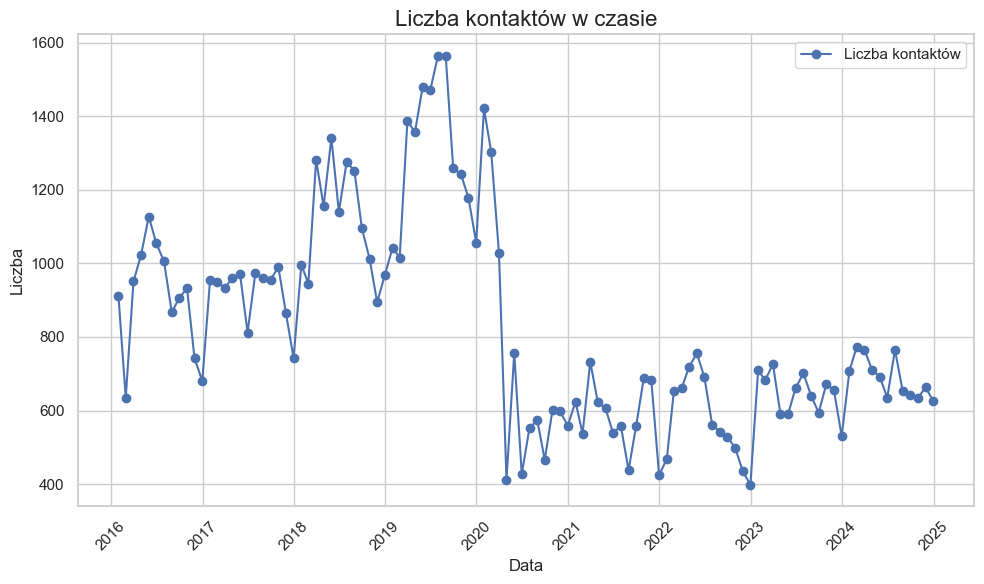

In [102]:
df_cp["CONTACT_DATE"] = pd.to_datetime(df_cp["CONTACT_DATE"], infer_datetime_format=True)
grouped = (
    df_cp.groupby(pd.Grouper(key="CONTACT_DATE", freq="ME"))
    .size()
    .reset_index(name="Count")
)

plt.figure(figsize=(10, 6))
plt.plot(
    grouped["CONTACT_DATE"],
    grouped["Count"],
    marker="o",
    linestyle="-",
    label="Liczba kontaktów",
)

plt.title("Liczba kontaktów w czasie", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Liczba", fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [103]:
df_cp["NAME"].value_counts()

NAME
GANGSTER DISCIPLES      2254
LATIN KINGS             1270
BLACK P STONES           828
SATAN DISCIPLES          753
FOUR CORNER HUSTLERS     633
                        ... 
OUTLAWS                    1
CRAZY LATIN BOYS           1
SURENO 13                  1
BLOODS                     1
LATIN ANGELS               1
Name: count, Length: 85, dtype: int64

In [104]:
df_cp["AGE"].value_counts()

AGE
20.0     3828
21.0     3733
18.0     3689
19.0     3567
23.0     3545
         ... 
87.0        1
89.0        1
1.0         1
510.0       1
88.0        1
Name: count, Length: 95, dtype: int64

In [105]:
df_cp["JUVENILE_I"].value_counts()

JUVENILE_I
N    79586
Y     9918
Name: count, dtype: int64

In [106]:
df_cp["BEAT"].value_counts()

BEAT
1112    1318
421     1048
1533    1041
1011    1000
1132     901
        ... 
1811      44
1654      40
235       33
4100       4
6100       1
Name: count, Length: 277, dtype: int64

In [107]:
df_cp["CITY"].value_counts()

CITY
CHICAGO             89294
CALUMET PARK           30
OAK PARK               23
EVANSTON               15
CHICAGO                15
CICERO                 12
EVERGREEN PARK         10
CHICAGO.                7
CALUMET CITY            7
NORRIDGE                6
MARKHAM                 4
CHGO                    4
CHCIAGO                 4
RIVERDALE               4
HARWOOD HEIGHTS         3
CHICAG                  3
BROADVIEW               3
BLUE ISLAND             3
CITY OF CHICAGO         3
BURBANK                 2
ELMWOOD PARK            2
CHCAGO                  2
LINCOLNWOOD             2
PARK RIDGE              2
HARVEY                  2
SKOKIE                  2
OAKPARK                 2
MAYWOOD                 2
OAK LAWN                2
ALSIP                   2
HOMEWOOD                2
NILES                   2
.CHICAGO                1
PALOS HEIGHTS           1
DOLTON                  1
CHIACGO                 1
FRANKLIN PARK           1
CHICAGO IL              1
LINCOLN

In [108]:
df_cp["STREET_NME"].value_counts()

STREET_NME
STATE ST           1860
HALSTED ST         1734
ASHLAND AVE        1617
MADISON ST         1438
PULASKI RD         1432
                   ... 
CALHOUN PL            1
FOREST VIEW AVE       1
MIDWAY ST             1
NEWARK AVE            1
SAUGANASH LN          1
Name: count, Length: 1239, dtype: int64

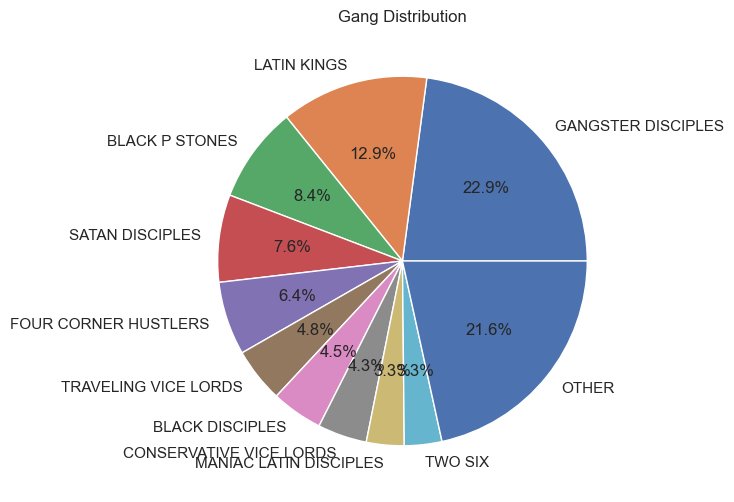

In [109]:
gang_counts = df_cp["NAME"].value_counts()
total = gang_counts.sum()
threshold = total * 0.02

main_gangs = gang_counts[gang_counts >= threshold]
other_count = gang_counts[gang_counts < threshold].sum()

if other_count > 0:
    main_gangs["OTHER"] = other_count

plt.figure(figsize=(10, 6))
plt.pie(main_gangs, labels=main_gangs.index, autopct="%1.1f%%")
plt.title("Gang Distribution")
plt.show()

In [110]:
pd.pivot_table(
    df_cp,
    index="ENFORCEMENT_ACTION_TAKEN_I",
    values=["AGE", "CONTACT_HOUR", "V_YEAR"],
    aggfunc="median",
)

,AGE,CONTACT_HOUR,V_YEAR
ENFORCEMENT_ACTION_TAKEN_I,,,
N,27.0,16.0,2008.0
Y,28.0,15.0,2008.0


In [111]:
print("=" * 80)
print("ANALIZA ZATRZYMAŃ WEDŁUG GŁÓWNEGO POLICJANTA (FO_EMPLOYEE_ID)")
print("=" * 80)

officer_stats = (
    df_cp.groupby("FO_EMPLOYEE_ID")
    .agg(
        {
            "CONTACT_CARD_ID": "count",
            "ENFORCEMENT_ACTION_TAKEN_I": lambda x: (
                    x == "Y"
            ).sum(),
            "PAT_DOWN_I": lambda x: (x == "Y").sum(),
            "SEARCH_I": lambda x: (x == "Y").sum(),
        }
    )
    .rename(
        columns={
            "CONTACT_CARD_ID": "Liczba_zatrzymań",
            "ENFORCEMENT_ACTION_TAKEN_I": "Z_działaniem",
            "PAT_DOWN_I": "Z_przeszukaniem",
            "SEARCH_I": "Z_przeszukaniem_pełnym",
        }
    )
)

officer_stats["Procent_z_działaniem"] = (
        officer_stats["Z_działaniem"] / officer_stats["Liczba_zatrzymań"] * 100
).round(2)
officer_stats = officer_stats.sort_values("Liczba_zatrzymań", ascending=False)

print(f"Liczba unikalnych policjantów: {len(officer_stats)}")
print(f"Średnia liczba zatrzymań na policjanta: {officer_stats['Liczba_zatrzymań'].mean():.2f}")
print(f"Mediana: {officer_stats['Liczba_zatrzymań'].median():.2f}")

print("\nTop 20 policjantów z największą liczbą zatrzymań:")
print(officer_stats.head(20).to_string())

ANALIZA ZATRZYMAŃ WEDŁUG GŁÓWNEGO POLICJANTA (FO_EMPLOYEE_ID)
Liczba unikalnych policjantów: 8934
Średnia liczba zatrzymań na policjanta: 10.02
Mediana: 4.00

Top 20 policjantów z największą liczbą zatrzymań:
                Liczba_zatrzymań  Z_działaniem  Z_przeszukaniem  Z_przeszukaniem_pełnym  Procent_z_działaniem
FO_EMPLOYEE_ID                                                                                               
513884                       296            98               11                      21                 33.11
312978                       148            21                8                      25                 14.19
300586                       139            82               58                      60                 58.99
367561                       139            22               15                      48                 15.83
343396                       137            29                1                       7                 21.17
143725               

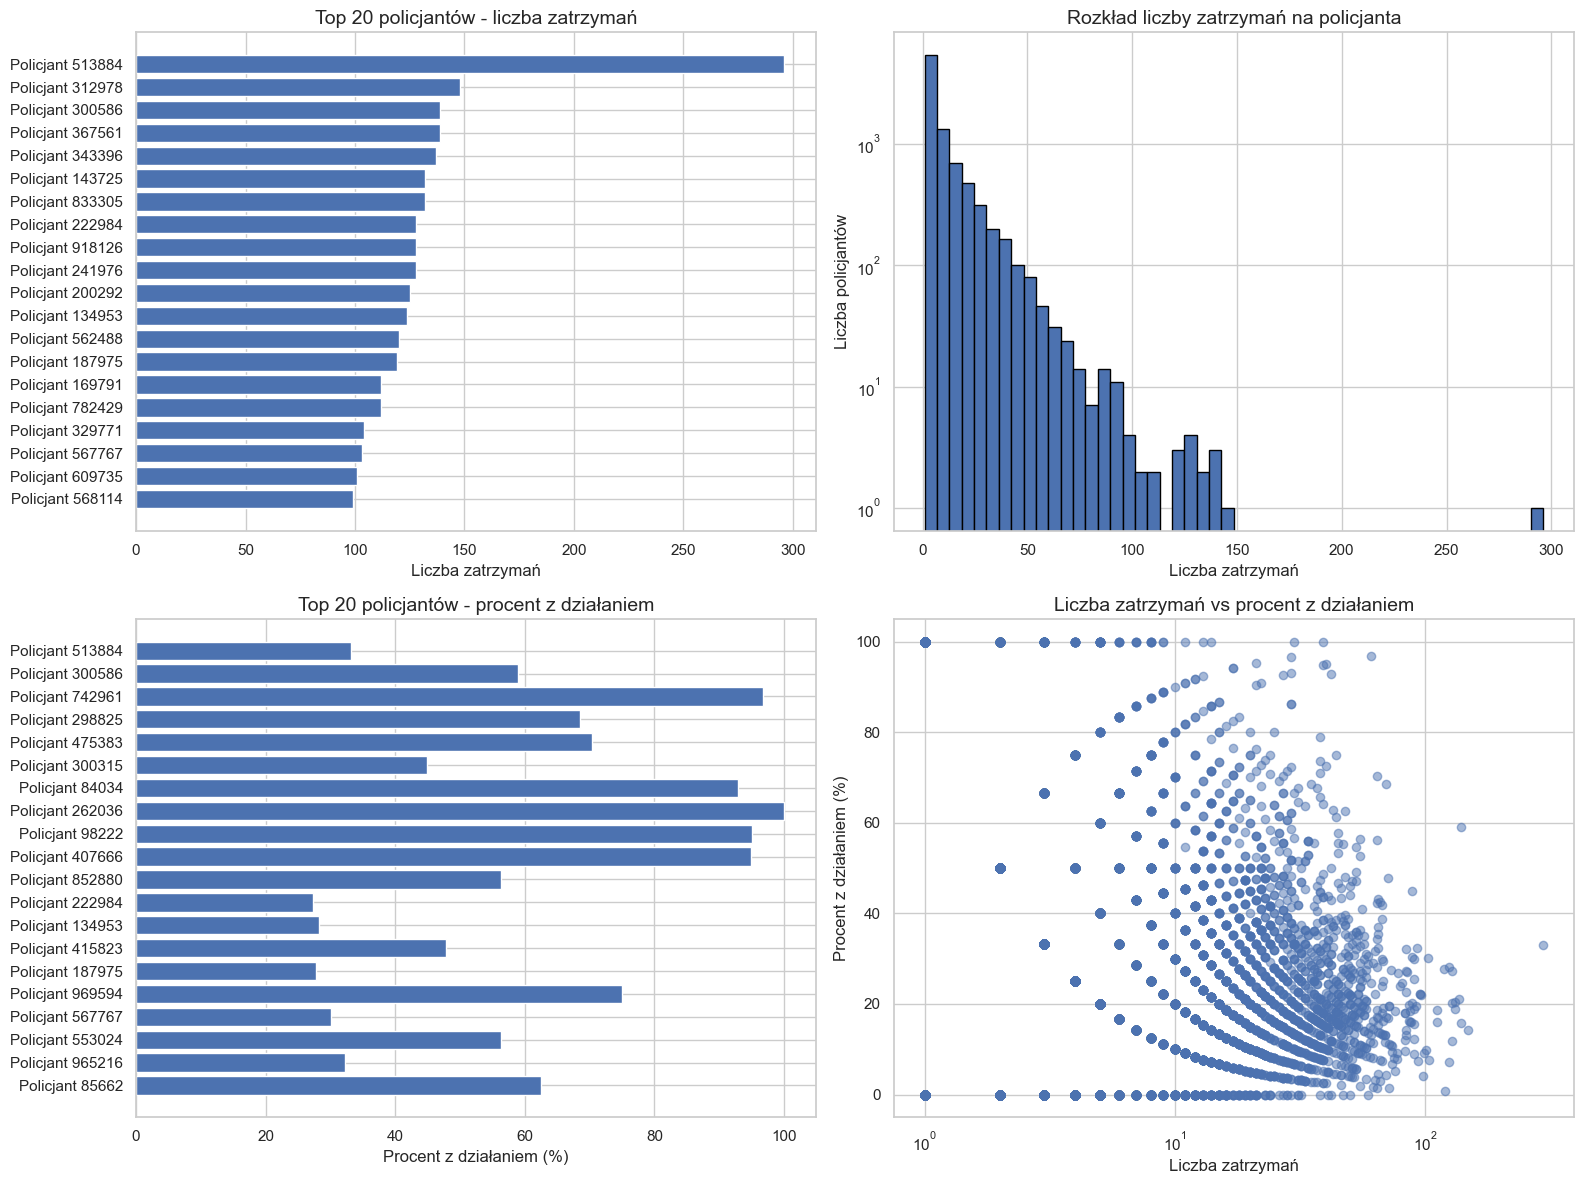

In [112]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

top_officers = officer_stats.head(20)
axes[0, 0].barh(range(len(top_officers)), top_officers["Liczba_zatrzymań"])
axes[0, 0].set_yticks(range(len(top_officers)))
axes[0, 0].set_yticklabels([f"Policjant {idx}" for idx in top_officers.index])
axes[0, 0].set_xlabel("Liczba zatrzymań", fontsize=12)
axes[0, 0].set_title("Top 20 policjantów - liczba zatrzymań", fontsize=14)
axes[0, 0].invert_yaxis()

axes[0, 1].hist(officer_stats["Liczba_zatrzymań"], bins=50, edgecolor="black")
axes[0, 1].set_xlabel("Liczba zatrzymań", fontsize=12)
axes[0, 1].set_ylabel("Liczba policjantów", fontsize=12)
axes[0, 1].set_title("Rozkład liczby zatrzymań na policjanta", fontsize=14)
axes[0, 1].set_yscale("log")

top_with_action = officer_stats.nlargest(20, "Z_działaniem")
axes[1, 0].barh(range(len(top_with_action)), top_with_action["Procent_z_działaniem"])
axes[1, 0].set_yticks(range(len(top_with_action)))
axes[1, 0].set_yticklabels([f"Policjant {idx}" for idx in top_with_action.index])
axes[1, 0].set_xlabel("Procent z działaniem (%)", fontsize=12)
axes[1, 0].set_title("Top 20 policjantów - procent z działaniem", fontsize=14)
axes[1, 0].invert_yaxis()

axes[1, 1].scatter(
    officer_stats["Liczba_zatrzymań"], officer_stats["Procent_z_działaniem"], alpha=0.5
)
axes[1, 1].set_xlabel("Liczba zatrzymań", fontsize=12)
axes[1, 1].set_ylabel("Procent z działaniem (%)", fontsize=12)
axes[1, 1].set_title("Liczba zatrzymań vs procent z działaniem", fontsize=14)
axes[1, 1].set_xscale("log")

plt.tight_layout()
plt.show()

In [113]:
print("\n" + "=" * 80)
print("ANALIZA ZATRZYMAŃ WEDŁUG JEDNOSTKI POLICJI (CPD_UNIT_NO)")
print("=" * 80)

unit_stats = (
    df_cp.groupby("CPD_UNIT_NO")
    .agg(
        {
            "CONTACT_CARD_ID": "count",
            "ENFORCEMENT_ACTION_TAKEN_I": lambda x: (x == "Y").sum(),
            "FO_EMPLOYEE_ID": "nunique",
        }
    )
    .rename(
        columns={
            "CONTACT_CARD_ID": "Liczba_zatrzymań",
            "ENFORCEMENT_ACTION_TAKEN_I": "Z_działaniem",
            "FO_EMPLOYEE_ID": "Liczba_policjantów",
        }
    )
)

unit_stats["Procent_z_działaniem"] = (
        unit_stats["Z_działaniem"] / unit_stats["Liczba_zatrzymań"] * 100
).round(2)
unit_stats["Średnia_zatrzymań_na_policjanta"] = (
        unit_stats["Liczba_zatrzymań"] / unit_stats["Liczba_policjantów"]
).round(2)
unit_stats = unit_stats.sort_values("Liczba_zatrzymań", ascending=False)

print(f"Liczba unikalnych jednostek: {len(unit_stats)}")
print(
    f"Średnia liczba zatrzymań na jednostkę: {unit_stats['Liczba_zatrzymań'].mean():.2f}"
)
print("\nTop 20 jednostek z największą liczbą zatrzymań:")
unit_stats.head(20)


ANALIZA ZATRZYMAŃ WEDŁUG JEDNOSTKI POLICJI (CPD_UNIT_NO)
Liczba unikalnych jednostek: 83
Średnia liczba zatrzymań na jednostkę: 1078.36

Top 20 jednostek z największą liczbą zatrzymań:


,Liczba_zatrzymań,Z_działaniem,Liczba_policjantów,Procent_z_działaniem,Średnia_zatrzymań_na_policjanta
CPD_UNIT_NO,,,,,
7,6377,1329,719,20.84,8.87
4,5511,935,531,16.97,10.38
8,4754,1044,549,21.96,8.66
25,4444,987,587,22.21,7.57
5,4126,930,449,22.54,9.19
6,4041,941,574,23.29,7.04
9,3987,897,501,22.50,7.96
11,3930,1430,620,36.39,6.34
10,3426,1108,513,32.34,6.68


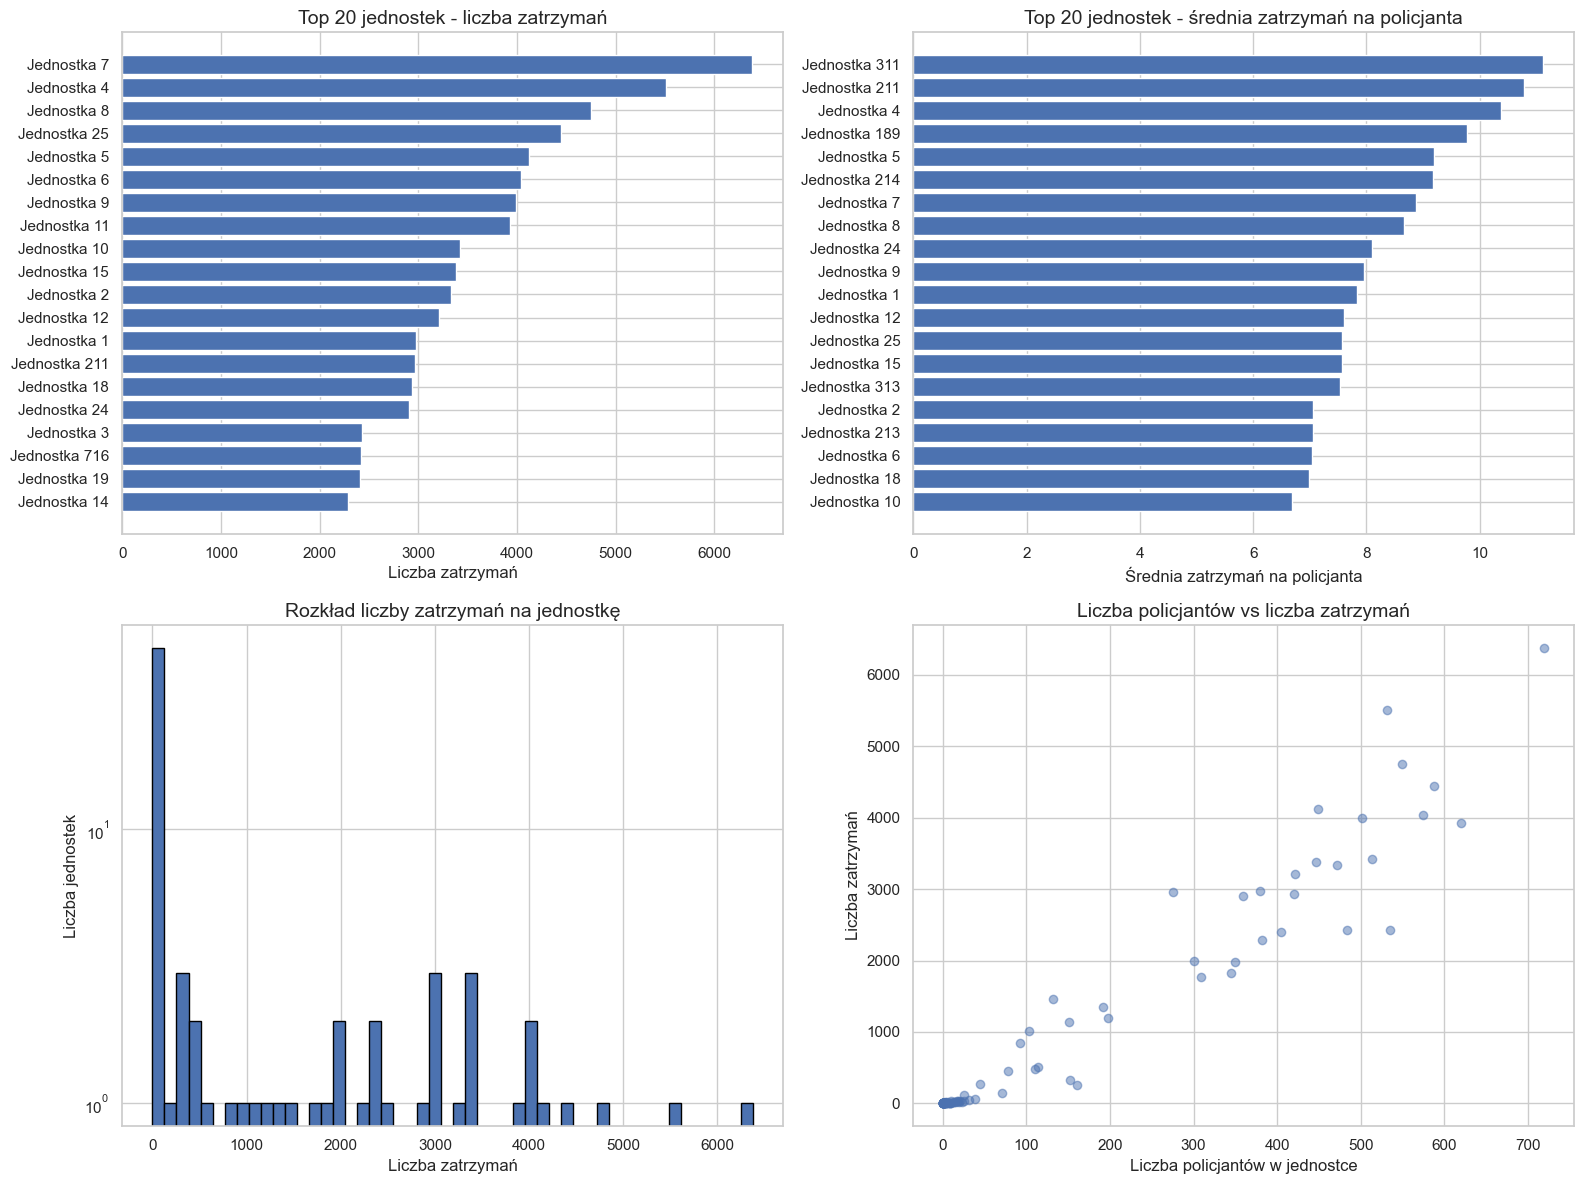

In [114]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

top_units = unit_stats.head(20)
axes[0, 0].barh(range(len(top_units)), top_units["Liczba_zatrzymań"])
axes[0, 0].set_yticks(range(len(top_units)))
axes[0, 0].set_yticklabels([f"Jednostka {idx}" for idx in top_units.index])
axes[0, 0].set_xlabel("Liczba zatrzymań", fontsize=12)
axes[0, 0].set_title("Top 20 jednostek - liczba zatrzymań", fontsize=14)
axes[0, 0].invert_yaxis()

top_avg = unit_stats.nlargest(20, "Średnia_zatrzymań_na_policjanta")
axes[0, 1].barh(range(len(top_avg)), top_avg["Średnia_zatrzymań_na_policjanta"])
axes[0, 1].set_yticks(range(len(top_avg)))
axes[0, 1].set_yticklabels([f"Jednostka {idx}" for idx in top_avg.index])
axes[0, 1].set_xlabel("Średnia zatrzymań na policjanta", fontsize=12)
axes[0, 1].set_title("Top 20 jednostek - średnia zatrzymań na policjanta", fontsize=14)
axes[0, 1].invert_yaxis()

axes[1, 0].hist(unit_stats["Liczba_zatrzymań"], bins=50, edgecolor="black")
axes[1, 0].set_xlabel("Liczba zatrzymań", fontsize=12)
axes[1, 0].set_ylabel("Liczba jednostek", fontsize=12)
axes[1, 0].set_title("Rozkład liczby zatrzymań na jednostkę", fontsize=14)
axes[1, 0].set_yscale("log")

axes[1, 1].scatter(
    unit_stats["Liczba_policjantów"], unit_stats["Liczba_zatrzymań"], alpha=0.5
)
axes[1, 1].set_xlabel("Liczba policjantów w jednostce", fontsize=12)
axes[1, 1].set_ylabel("Liczba zatrzymań", fontsize=12)
axes[1, 1].set_title("Liczba policjantów vs liczba zatrzymań", fontsize=14)

plt.tight_layout()
plt.show()

In [115]:
print("\n" + "=" * 80)
print("ANALIZA ZATRZYMAŃ WEDŁUG DYSTRYKTU")
print("=" * 80)

district_stats = (
    df_cp.groupby("DISTRICT")
    .agg(
        {
            "CONTACT_CARD_ID": "count",
            "ENFORCEMENT_ACTION_TAKEN_I": lambda x: (x == "Y").sum(),
            "FO_EMPLOYEE_ID": "nunique",
        }
    )
    .rename(
        columns={
            "CONTACT_CARD_ID": "Liczba_zatrzymań",
            "ENFORCEMENT_ACTION_TAKEN_I": "Z_działaniem",
            "FO_EMPLOYEE_ID": "Liczba_policjantów",
        }
    )
)

district_stats["Procent_z_działaniem"] = (
        district_stats["Z_działaniem"] / district_stats["Liczba_zatrzymań"] * 100
).round(2)

district_stats = district_stats.sort_values("Liczba_zatrzymań", ascending=False)
district_stats


ANALIZA ZATRZYMAŃ WEDŁUG DYSTRYKTU


,Liczba_zatrzymań,Z_działaniem,Liczba_policjantów,Procent_z_działaniem
DISTRICT,,,,
11,8253,2725,1589,33.02
7,7832,1843,1232,23.53
4,5941,1108,792,18.65
8,5338,1200,868,22.48
9,5307,1207,964,22.74
10,4990,1406,1027,28.18
25,4941,1069,872,21.64
6,4824,1215,1035,25.19
5,4368,991,689,22.69


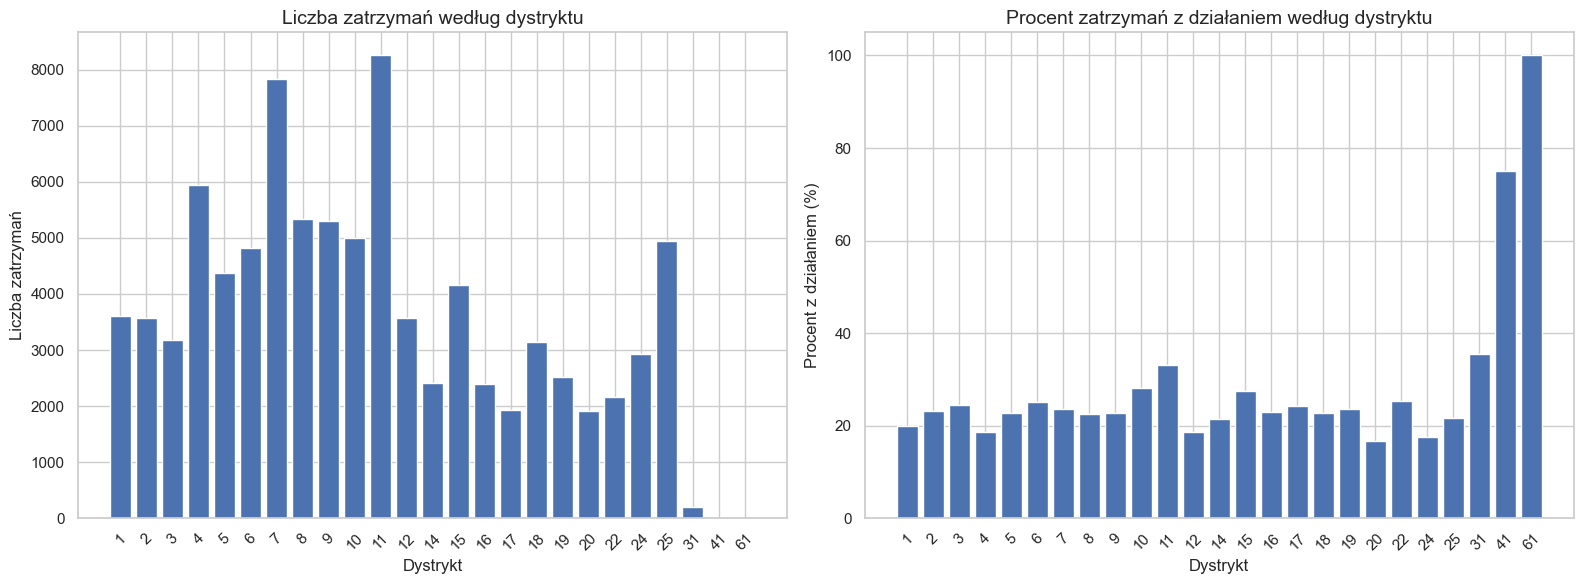

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

district_sorted = district_stats.sort_index()
axes[0].bar(district_sorted.index.astype(str), district_sorted["Liczba_zatrzymań"])
axes[0].set_xlabel("Dystrykt", fontsize=12)
axes[0].set_ylabel("Liczba zatrzymań", fontsize=12)
axes[0].set_title("Liczba zatrzymań według dystryktu", fontsize=14)
axes[0].tick_params(axis="x", rotation=45)

axes[1].bar(district_sorted.index.astype(str), district_sorted["Procent_z_działaniem"])
axes[1].set_xlabel("Dystrykt", fontsize=12)
axes[1].set_ylabel("Procent z działaniem (%)", fontsize=12)
axes[1].set_title("Procent zatrzymań z działaniem według dystryktu", fontsize=14)
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

In [117]:
import numpy as np

print("=" * 80)
print("ANALIZA: RASA vs ENFORCEMENT ACTION TAKEN")
print("=" * 80)

race_enforcement = pd.crosstab(
    df_cp["RACE_CODE_CD"], df_cp["ENFORCEMENT_ACTION_TAKEN_I"], margins=True
)
print("\nTABELA KRZYŻOWA - Rasa vs Enforcement Action Taken:")
print(race_enforcement)

race_enforcement_pct = (
        pd.crosstab(df_cp["RACE_CODE_CD"], df_cp["ENFORCEMENT_ACTION_TAKEN_I"], normalize="index") * 100
)
print("\n\nJak często podejmowano działanie (procentowo):")
print(race_enforcement_pct.round(2))

race_stats = (
    df_cp.groupby("RACE_CODE_CD")
    .agg(
        {
            "CONTACT_CARD_ID": "count",
            "ENFORCEMENT_ACTION_TAKEN_I": lambda x: (x == "Y").sum(),
            "PAT_DOWN_I": lambda x: (x == "Y").sum(),
            "SEARCH_I": lambda x: (x == "Y").sum(),
            "WEAPON_OR_CONTRABAND_FOUND_I": lambda x: (x == "Y").sum(),
        }
    )
    .rename(
        columns={
            "CONTACT_CARD_ID": "Liczba_zatrzymań",
            "ENFORCEMENT_ACTION_TAKEN_I": "Z_działaniem",
            "PAT_DOWN_I": "Z_przeszukaniem",
            "SEARCH_I": "Z_przeszukaniem_pełnym",
            "WEAPON_OR_CONTRABAND_FOUND_I": "Znaleziono_broń_lub_narkotyki",
        }
    )
)

race_stats["Procent_z_działaniem"] = (
        race_stats["Z_działaniem"] / race_stats["Liczba_zatrzymań"] * 100
).round(2)
race_stats["Procent_z_przeszukaniem"] = (
        race_stats["Z_przeszukaniem"] / race_stats["Liczba_zatrzymań"] * 100
).round(2)
race_stats["Procent_z_pełnym_przeszukaniem"] = (
        race_stats["Z_przeszukaniem_pełnym"] / race_stats["Liczba_zatrzymań"] * 100
).round(2)
race_stats["Procent_znaleziono_broń"] = (
        race_stats["Znaleziono_broń_lub_narkotyki"] / race_stats["Liczba_zatrzymań"] * 100
).round(2)

race_stats = race_stats.sort_values("Liczba_zatrzymań", ascending=False)
race_stats

ANALIZA: RASA vs ENFORCEMENT ACTION TAKEN

TABELA KRZYŻOWA - Rasa vs Enforcement Action Taken:
ENFORCEMENT_ACTION_TAKEN_I      N      Y    All
RACE_CODE_CD                                   
API                           646    168    814
BLK                         46068  15150  61218
I                              89     27    116
P                              94     30    124
U                               1      0      1
WBH                             1      5      6
WHI                             1     31     32
WHT                          5571   1469   7040
WWH                         15832   4321  20153
All                         68303  21201  89504


Jak często podejmowano działanie (procentowo):
ENFORCEMENT_ACTION_TAKEN_I       N      Y
RACE_CODE_CD                             
API                          79.36  20.64
BLK                          75.25  24.75
I                            76.72  23.28
P                            75.81  24.19
U                           

,Liczba_zatrzymań,Z_działaniem,Z_przeszukaniem,Z_przeszukaniem_pełnym,Znaleziono_broń_lub_narkotyki,Procent_z_działaniem,Procent_z_przeszukaniem,Procent_z_pełnym_przeszukaniem,Procent_znaleziono_broń
RACE_CODE_CD,,,,,,,,,
BLK,61218,15150,22135,13166,2071,24.75,36.16,21.51,3.38
WWH,20153,4321,6596,3489,483,21.44,32.73,17.31,2.40
WHT,7040,1469,1234,965,134,20.87,17.53,13.71,1.90
API,814,168,186,109,22,20.64,22.85,13.39,2.70
P,124,30,31,21,4,24.19,25.00,16.94,3.23
I,116,27,26,12,2,23.28,22.41,10.34,1.72
WHI,32,31,6,23,0,96.88,18.75,71.88,0.00
WBH,6,5,4,6,1,83.33,66.67,100.00,16.67
U,1,0,0,1,0,0.00,0.00,100.00,0.00


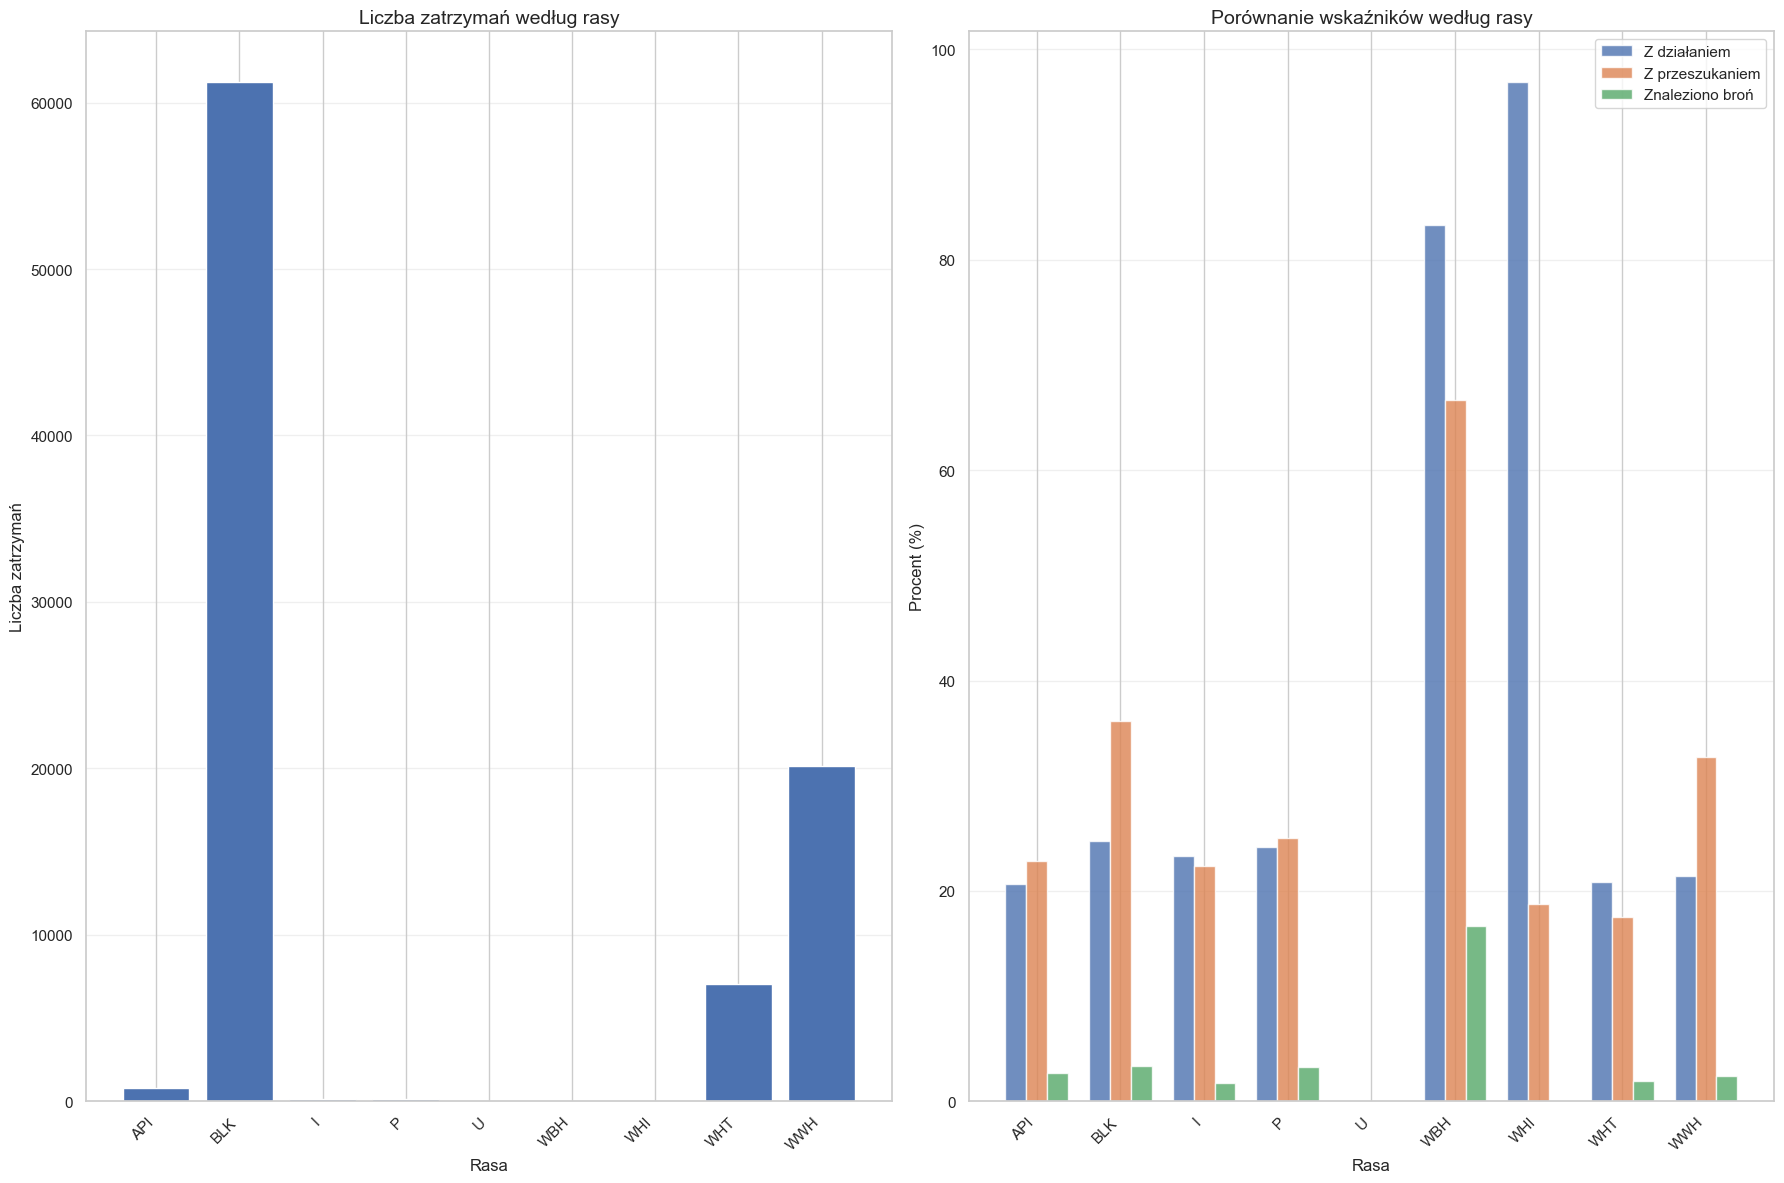

In [118]:
fig, axes = plt.subplots(1, 2, figsize=(18, 12))

race_counts = df_cp["RACE_CODE_CD"].value_counts().sort_index()

axes[0].bar(range(len(race_counts)), race_counts.values)
axes[0].set_xticks(range(len(race_counts)))
axes[0].set_xticklabels(race_counts.index, rotation=45, ha="right")
axes[0].set_xlabel("Rasa", fontsize=12)
axes[0].set_ylabel("Liczba zatrzymań", fontsize=12)
axes[0].set_title("Liczba zatrzymań według rasy", fontsize=14)
axes[0].grid(axis="y", alpha=0.3)

race_stats = race_stats.sort_index()

x_pos = np.arange(len(race_stats))
width_bar = 0.25

axes[1].bar(
    x_pos - width_bar,
    race_stats["Procent_z_działaniem"],
    width_bar,
    label="Z działaniem",
    alpha=0.8,
)
axes[1].bar(
    x_pos,
    race_stats["Procent_z_przeszukaniem"],
    width_bar,
    label="Z przeszukaniem",
    alpha=0.8,
)
axes[1].bar(
    x_pos + width_bar,
    race_stats["Procent_znaleziono_broń"],
    width_bar,
    label="Znaleziono broń",
    alpha=0.8,
)

axes[1].set_xlabel("Rasa", fontsize=12)
axes[1].set_ylabel("Procent (%)", fontsize=12)
axes[1].set_title("Porównanie wskaźników według rasy", fontsize=14)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(race_stats.index, rotation=45, ha="right")
axes[1].legend()
axes[1].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

In [119]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df_cp["RACE_CODE_CD"], df_cp["ENFORCEMENT_ACTION_TAKEN_I"])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\n\nTEST STATYSTYCZNY (Chi-kwadrat):")
print(f"Chi-kwadrat: {chi2:.4f}")
print(f"p-value: {p_value:.2e}")
print(f"Stopnie swobody: {dof}")
if p_value < 0.05:
    print("Wniosek: Istnieje statystycznie istotna zależność między rasą a działaniem (p < 0.05)")
else:
    print("Wniosek: Brak statystycznie istotnej zależności (p >= 0.05)")



TEST STATYSTYCZNY (Chi-kwadrat):
Chi-kwadrat: 236.4770
p-value: 1.26e-46
Stopnie swobody: 8
Wniosek: Istnieje statystycznie istotna zależność między rasą a działaniem (p < 0.05)


In [120]:
print("=" * 80)
print("OCENA PRZYDATNOŚCI DANYCH DO MODELOWANIA")
print("=" * 80)

print("\n" + "=" * 80)
print("STRUKTURA DANYCH I DOSTĘPNE INFORMACJE")
print("=" * 80)

print("\n📊 Podstawowe informacje:")
print(f"   - Liczba rekordów: {len(df_cp):,}")
print(f"   - Liczba kolumn: {len(df_cp.columns)}")
print(f"   - Zakres czasowy: {df_cp['CONTACT_DATE'].min()} - {df_cp['CONTACT_DATE'].max()}")

print("\n📋 Kategoryzacja dostępnych pól:")

contextual_features = [
    "CONTACT_DATE",
    "CONTACT_HOUR",
    "DISTRICT",
    "SECTOR",
    "BEAT",
    "AREA",
    "STREET_NO",
    "STREET_DIRECTION_CD",
    "STREET_NME",
    "CITY",
    "ZIP_CD",
    "LOCATION_CD",
]
print(f"\n   1.1. CECHY KONTEKSTOWE ({len(contextual_features)} pól):")
for feat in contextual_features:
    if feat in df_cp.columns:
        missing_pct = df_cp[feat].isnull().sum() / len(df_cp) * 100
        print(f"      • {feat}: {missing_pct:.1f}% braków")

personal_features = [
    "AGE",
    "AGE_TO",
    "SEX_CODE_CD",
    "RACE_CODE_CD",
    "HEIGHT",
    "WEIGHT",
    "BUILD_CODE_CD",
    "EYE_COLOR_CODE_CD",
    "HAIR_COLOR_CODE_CD",
    "HAIR_STYLE_CODE_CD",
    "COMPLEXION_CODE_CD",
    "JUVENILE_I",
]
print(f"\n   1.2. CECHY OSOBOWE ({len(personal_features)} pól):")
for feat in personal_features:
    if feat in df_cp.columns:
        missing_pct = df_cp[feat].isnull().sum() / len(df_cp) * 100
        print(f"      • {feat}: {missing_pct:.1f}% braków")

operational_features = [
    "FO_EMPLOYEE_ID",
    "SO_EMPLOYEE_ID",
    "SUPV_EMPLOYEE_ID",
    "CPD_UNIT_NO",
    "SUBMITTING_UNIT",
    "SUBMITTING_BEAT_CD",
    "EVENT_NO",
    "MISSION_NO",
    "HOTSPOT_NO",
]
print(f"\n   1.3. CECHY OPERACYJNE ({len(operational_features)} pól):")
for feat in operational_features:
    if feat in df_cp.columns:
        missing_pct = df_cp[feat].isnull().sum() / len(df_cp) * 100
        print(f"      • {feat}: {missing_pct:.1f}% braków")

interaction_features = [
    "PAT_DOWN_I",
    "PAT_DOWN_CONSENT_I",
    "SEARCH_I",
    "SEARCH_CONSENT_I",
    "HANDCUFFED_I",
    "VEHICLE_INVOLVED_I",
    "VEHICLE_STOPPED_I",
    "BODY_CAMERA_I",
    "CAR_CAMERA_I",
    "INFORMATION_REFUSED_I",
]
print(f"\n   1.4. CECHY INTERAKCJI ({len(interaction_features)} pól):")
for feat in interaction_features:
    if feat in df_cp.columns:
        missing_pct = df_cp[feat].isnull().sum() / len(df_cp) * 100
        print(f"      • {feat}: {missing_pct:.1f}% braków")

justification_features = [
    "INDICATIVE_DRUG_TRANSACTION_I",
    "INDICATIVE_CASING_I",
    "FITS_DESCRIPTION_I",
    "PROXIMITY_TO_CRIME_I",
    "FITS_DESCRIPTION_OFFENDER_I",
    "GANG_NARCOTIC_RELATED_I",
    "OTHER_FACTOR_I",
    "VERBAL_THREATS_I",
    "SUSPICIOUS_OBJECT_I",
]
print(f"\n   1.5. UZASADNIENIA ZATRZYMANIA ({len(justification_features)} pól):")
for feat in justification_features:
    if feat in df_cp.columns:
        missing_pct = df_cp[feat].isnull().sum() / len(df_cp) * 100
        print(f"      • {feat}: {missing_pct:.1f}% braków")

print("\n   🎯 ZMIENNA DOCELOWA (TARGET):")
if "ENFORCEMENT_ACTION_TAKEN_I" in df_cp.columns:
    target_dist = df_cp["ENFORCEMENT_ACTION_TAKEN_I"].value_counts()
    target_pct = df_cp["ENFORCEMENT_ACTION_TAKEN_I"].value_counts(normalize=True) * 100
    print("      • ENFORCEMENT_ACTION_TAKEN_I:")
    for val, count in target_dist.items():
        print(f"        - {val}: {count:,} ({target_pct[val]:.1f}%)")
    print(
        f"      • Status: {'✓ Jednoznacznie zdefiniowana' if len(target_dist) == 2 else '⚠ Wymaga weryfikacji'}"
    )

OCENA PRZYDATNOŚCI DANYCH DO MODELOWANIA

STRUKTURA DANYCH I DOSTĘPNE INFORMACJE

📊 Podstawowe informacje:
   - Liczba rekordów: 89,504
   - Liczba kolumn: 169
   - Zakres czasowy: 2016-01-01 00:02:00 - 2024-12-31 23:44:00

📋 Kategoryzacja dostępnych pól:

   1.1. CECHY KONTEKSTOWE (12 pól):
      • CONTACT_DATE: 0.0% braków
      • CONTACT_HOUR: 0.0% braków
      • DISTRICT: 0.0% braków
      • SECTOR: 0.0% braków
      • BEAT: 0.0% braków
      • AREA: 0.0% braków
      • STREET_NO: 0.0% braków
      • STREET_DIRECTION_CD: 0.0% braków
      • STREET_NME: 0.0% braków
      • CITY: 0.0% braków
      • ZIP_CD: 0.2% braków
      • LOCATION_CD: 0.0% braków

   1.2. CECHY OSOBOWE (12 pól):
      • AGE: 0.6% braków
      • AGE_TO: 98.1% braków
      • SEX_CODE_CD: 0.0% braków
      • RACE_CODE_CD: 0.0% braków
      • HEIGHT: 0.0% braków
      • WEIGHT: 0.0% braków
      • BUILD_CODE_CD: 0.0% braków
      • EYE_COLOR_CODE_CD: 0.0% braków
      • HAIR_COLOR_CODE_CD: 0.0% braków
      • HAIR_S

In [121]:
print("\n" + "=" * 80)
print("KOMPLETNOŚĆ I ROZKŁADY")
print("=" * 80)

important_cols = [
    "CONTACT_DATE",
    "CONTACT_HOUR",
    "DISTRICT",
    "AGE",
    "SEX_CODE_CD",
    "RACE_CODE_CD",
    "FO_EMPLOYEE_ID",
    "ENFORCEMENT_ACTION_TAKEN_I",
    "PAT_DOWN_I",
    "SEARCH_I",
]

print("\n📊 Kompletność najważniejszych kolumn:")
completeness_df_cp = pd.DataFrame(
    {
        "Kolumna": important_cols,
        "Kompletność (%)": [
            (df_cp[col].notna().sum() / len(df_cp) * 100).round(2) if col in df_cp.columns else 0
            for col in important_cols
        ],
    }
)
completeness_df_cp = completeness_df_cp.sort_values("Kompletność (%)", ascending=True)
print(completeness_df_cp.to_string(index=False))

print("\n👥 Rozkłady demograficzne:")
if "RACE_CODE_CD" in df_cp.columns:
    race_dist = df_cp["RACE_CODE_CD"].value_counts()
    print("\n   Rasa:")
    for race, count in race_dist.head(10).items():
        pct = count / len(df_cp) * 100
        print(f"      • {race}: {count:,} ({pct:.1f}%)")

if "SEX_CODE_CD" in df_cp.columns:
    sex_dist = df_cp["SEX_CODE_CD"].value_counts()
    print("\n   Płeć:")
    for sex, count in sex_dist.items():
        pct = count / len(df_cp) * 100
        print(f"      • {sex}: {count:,} ({pct:.1f}%)")

if "AGE" in df_cp.columns:
    print("\n   Wiek:")
    print(f"      • Średnia: {df_cp['AGE'].mean():.1f} lat")
    print(f"      • Mediana: {df_cp['AGE'].median():.1f} lat")
    print(f"      • Min: {df_cp['AGE'].min():.0f}, Max: {df_cp['AGE'].max():.0f} lat")

print("\n📅 Rozkład czasowy:")
if "CONTACT_DATE" in df_cp.columns and "CONTACT_HOUR" in df_cp.columns:
    #df_cp["CONTACT_DATE"] = pd.to_datetime(df_cp["CONTACT_DATE"], errors="coerce")
    df_cp["YEAR"] = df_cp["CONTACT_DATE"].dt.year
    df_cp["MONTH"] = df_cp["CONTACT_DATE"].dt.month
    df_cp["DAY_OF_WEEK"] = df_cp["CONTACT_DATE"].dt.day_name()

    year_dist = df_cp["YEAR"].value_counts().sort_index()
    print("\n   Zatrzymania według roku:")
    for year, count in year_dist.items():
        print(f"      • {int(year)}: {count:,}")

    hour_dist = df_cp["CONTACT_HOUR"].value_counts().sort_index()
    peak_hours = hour_dist.nlargest(3)
    print("\n   Najczęstsze godziny zatrzymań:")
    for hour, count in peak_hours.items():
        print(f"      • {hour}:00 - {count:,} ({count / len(df_cp) * 100:.1f}%)")

print("\n🗺️ Rozkład przestrzenny:")
if "DISTRICT" in df_cp.columns:
    district_dist = df_cp["DISTRICT"].value_counts().head(5)
    print("\n   Top 5 dystryktów:")
    for dist, count in district_dist.items():
        print(f"      • Dystrykt {dist}: {count:,} ({count / len(df_cp) * 100:.1f}%)")

print("\n⚖️ Zbalansowanie targetu:")
if "ENFORCEMENT_ACTION_TAKEN_I" in df_cp.columns:
    target_counts = df_cp["ENFORCEMENT_ACTION_TAKEN_I"].value_counts()
    if len(target_counts) == 2:
        ratio = target_counts.iloc[0] / target_counts.iloc[1]
        imbalance_level = (
            "Bardzo zbalansowany"
            if 0.8 <= ratio <= 1.25
            else "Umiarkowanie niezbalansowany"
            if 0.5 <= ratio <= 2.0
            else "Znacznie niezbalansowany"
        )
        print(f"   • Stosunek klas: {ratio:.2f}:1")
        print(f"   • Ocena: {imbalance_level}")


KOMPLETNOŚĆ I ROZKŁADY

📊 Kompletność najważniejszych kolumn:
                   Kolumna  Kompletność (%)
                       AGE            99.45
              CONTACT_DATE           100.00
              CONTACT_HOUR           100.00
                  DISTRICT           100.00
               SEX_CODE_CD           100.00
              RACE_CODE_CD           100.00
            FO_EMPLOYEE_ID           100.00
ENFORCEMENT_ACTION_TAKEN_I           100.00
                PAT_DOWN_I           100.00
                  SEARCH_I           100.00

👥 Rozkłady demograficzne:

   Rasa:
      • BLK: 61,218 (68.4%)
      • WWH: 20,153 (22.5%)
      • WHT: 7,040 (7.9%)
      • API: 814 (0.9%)
      • P: 124 (0.1%)
      • I: 116 (0.1%)
      • WHI: 32 (0.0%)
      • WBH: 6 (0.0%)
      • U: 1 (0.0%)

   Płeć:
      • M: 77,162 (86.2%)
      • F: 12,294 (13.7%)
      • X: 48 (0.1%)

   Wiek:
      • Średnia: 31.3 lat
      • Mediana: 27.0 lat
      • Min: 0, Max: 823 lat

📅 Rozkład czasowy:

   Zat

In [122]:
print("\n" + "=" * 80)
print("STABILNOŚĆ DANYCH W CZASIE")
print("=" * 80)

if "CONTACT_DATE" in df_cp.columns and df_cp["CONTACT_DATE"].notna().sum() > 0:
    df_cp["YEAR"] = pd.to_datetime(df_cp["CONTACT_DATE"], errors="coerce").dt.year

    yearly_stats = (
        df_cp.groupby("YEAR")
        .agg(
            {
                "CONTACT_CARD_ID": "count",
                "ENFORCEMENT_ACTION_TAKEN_I": lambda x: (x == "Y").sum()
                if "Y" in x.values
                else 0,
                "AGE": "mean",
                "FO_EMPLOYEE_ID": "nunique",
            }
        )
        .rename(
            columns={
                "CONTACT_CARD_ID": "Liczba_zatrzymań",
                "ENFORCEMENT_ACTION_TAKEN_I": "Z_działaniem",
                "AGE": "Średni_wiek",
                "FO_EMPLOYEE_ID": "Liczba_policjantów",
            }
        )
    )

    yearly_stats["Procent_z_działaniem"] = (
            yearly_stats["Z_działaniem"] / yearly_stats["Liczba_zatrzymań"] * 100
    ).round(2)

    print("\n📈 Trendy roczne:")
    print(yearly_stats.to_string())

    cv_stops = (
                       yearly_stats["Liczba_zatrzymań"].std() / yearly_stats["Liczba_zatrzymań"].mean()
               ) * 100
    cv_enforcement = (
                             yearly_stats["Procent_z_działaniem"].std()
                             / yearly_stats["Procent_z_działaniem"].mean()
                     ) * 100

    print("\n   Zmienność:")
    print(f"      • Liczba zatrzymań (CV): {cv_stops:.1f}%")
    print(f"      • Procent z działaniem (CV): {cv_enforcement:.1f}%")

    stability = (
        "Stabilny"
        if cv_stops < 20
        else "Umiarkowanie zmienny"
        if cv_stops < 40
        else "Zmienny"
    )
    print(f"      • Ocena stabilności: {stability}")


STABILNOŚĆ DANYCH W CZASIE

📈 Trendy roczne:
      Liczba_zatrzymań  Z_działaniem  Średni_wiek  Liczba_policjantów  Procent_z_działaniem
YEAR                                                                                       
2016             10832          3249    30.017768                3143                 29.99
2017             11065          3263    30.201205                3198                 29.49
2018             13355          3463    31.209608                3662                 25.93
2019             15613          3186    31.885593                3914                 20.41
2020              8697          1737    31.288182                2907                 19.97
2021              7009          1356    31.421850                2118                 19.35
2022              6911          1460    31.660859                1990                 21.13
2023              7755          1680    31.791984                2108                 21.66
2024              8267          18

In [123]:
print("\n" + "=" * 80)
print("SPÓJNOŚĆ DANYCH")
print("=" * 80)

issues_found = []

if "AGE" in df_cp.columns:
    age_issues = df_cp[(df_cp["AGE"] < 0) | (df_cp["AGE"] > 120)]
    if len(age_issues) > 0:
        issues_found.append(
            f"Nieprawidłowy wiek (< 0 lub > 120): {len(age_issues)} rekordów ({len(age_issues) / len(df_cp) * 100:.2f}%)"
        )
    else:
        print("✓ Wiek: Wszystkie wartości w rozsądnym zakresie")

if "CONTACT_HOUR" in df_cp.columns:
    hour_issues = df_cp[(df_cp["CONTACT_HOUR"] < 0) | (df_cp["CONTACT_HOUR"] > 23)]
    if len(hour_issues) > 0:
        issues_found.append(
            f"Nieprawidłowa godzina (< 0 lub > 23): {len(hour_issues)} rekordów"
        )
    else:
        print("✓ Godzina kontaktu: Wszystkie wartości w zakresie 0-23")

if "AGE" in df_cp.columns and "JUVENILE_I" in df_cp.columns:
    juvenile_age_issues = df_cp[(df_cp["JUVENILE_I"] == "Y") & (df_cp["AGE"] >= 18)]
    if len(juvenile_age_issues) > 0:
        issues_found.append(
            "Nieletni z wiekiem >= 18: {len(juvenile_age_issues)} rekordów"
        )
    else:
        print("✓ Spójność wiek/nieletni: Brak niespójności")

if "AGE" in df_cp.columns:
    Q1 = df_cp["AGE"].quantile(0.25)
    Q3 = df_cp["AGE"].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_cp[(df_cp["AGE"] < Q1 - 1.5 * IQR) | (df_cp["AGE"] > Q3 + 1.5 * IQR)]
    print(
        f"⚠ Wartości odstające wieku (IQR): {len(outliers)} rekordów ({len(outliers) / len(df_cp) * 100:.2f}%)"
    )

if issues_found:
    print("\n⚠ Znalezione niespójności:")
    for issue in issues_found:
        print(f"   • {issue}")
else:
    print("\n✓ Ogólna spójność danych: Dobra")


SPÓJNOŚĆ DANYCH
✓ Godzina kontaktu: Wszystkie wartości w zakresie 0-23
✓ Spójność wiek/nieletni: Brak niespójności
⚠ Wartości odstające wieku (IQR): 801 rekordów (0.89%)

⚠ Znalezione niespójności:
   • Nieprawidłowy wiek (< 0 lub > 120): 5 rekordów (0.01%)


In [124]:
print("\n" + "=" * 80)
print("ZGODNOŚĆ Z CELEM PRACY - PRZEWIDYWANIE ENFORCEMENT ACTION")
print("=" * 80)

alignment_score = 0
max_score = 6

print("\n📋 Ocena dostępności informacji:")

circumstance_vars = [
    "INDICATIVE_DRUG_TRANSACTION_I",
    "PROXIMITY_TO_CRIME_I",
    "FITS_DESCRIPTION_I",
    "GANG_NARCOTIC_RELATED_I",
]
available_circumstances = sum([1 for var in circumstance_vars if var in df_cp.columns])
print(
    f"   1. Okoliczności zatrzymania: {available_circumstances}/{len(circumstance_vars)} pól dostępnych"
)
if available_circumstances >= 3:
    alignment_score += 1
    print("      ✓ Wystarczająco")

personal_vars = ["AGE", "SEX_CODE_CD", "RACE_CODE_CD", "JUVENILE_I"]
available_personal = sum(
    [1 for var in personal_vars if df_cp[var].notna().sum() > len(df_cp) * 0.8]
)
print(
    f"   2. Cechy osobowe: {available_personal}/{len(personal_vars)} pól w pełni dostępnych"
)
if available_personal >= 3:
    alignment_score += 1
    print("      ✓ Wystarczająco")

location_vars = ["DISTRICT", "SECTOR", "BEAT", "HOTSPOT_NO"]
available_location = sum([1 for var in location_vars if var in df_cp.columns])
print(
    f"   3. Kontekst miejsca: {available_location}/{len(location_vars)} pól dostępnych"
)
if available_location >= 3:
    alignment_score += 1
    print("      ✓ Wystarczająco")

interaction_vars = ["PAT_DOWN_I", "SEARCH_I", "PAT_DOWN_CONSENT_I"]
available_interaction = sum([1 for var in interaction_vars if var in df_cp.columns])
print(
    f"   4. Przebieg interakcji: {available_interaction}/{len(interaction_vars)} pól dostępnych"
)
if available_interaction >= 2:
    alignment_score += 1
    print("      ✓ Wystarczająco")

officer_vars = ["FO_EMPLOYEE_ID", "CPD_UNIT_NO", "SO_EMPLOYEE_ID"]
available_officer = sum([1 for var in officer_vars if var in df_cp.columns])
print(
    f"   5. Informacja o funkcjonariuszu: {available_officer}/{len(officer_vars)} pól dostępnych"
)
if available_officer >= 2:
    alignment_score += 1
    print("      ✓ Wystarczająco")

if "ENFORCEMENT_ACTION_TAKEN_I" in df_cp.columns and df_cp[
    "ENFORCEMENT_ACTION_TAKEN_I"
].notna().sum() == len(df_cp):
    alignment_score += 1
    print("   6. Zmienna docelowa: ✓ W pełni dostępna i kompletna")

print(
    f"\n   📊 Wskaźnik zgodności: {alignment_score}/{max_score} ({alignment_score / max_score * 100:.0f}%)"
)


ZGODNOŚĆ Z CELEM PRACY - PRZEWIDYWANIE ENFORCEMENT ACTION

📋 Ocena dostępności informacji:
   1. Okoliczności zatrzymania: 4/4 pól dostępnych
      ✓ Wystarczająco
   2. Cechy osobowe: 4/4 pól w pełni dostępnych
      ✓ Wystarczająco
   3. Kontekst miejsca: 4/4 pól dostępnych
      ✓ Wystarczająco
   4. Przebieg interakcji: 3/3 pól dostępnych
      ✓ Wystarczająco
   5. Informacja o funkcjonariuszu: 3/3 pól dostępnych
      ✓ Wystarczająco
   6. Zmienna docelowa: ✓ W pełni dostępna i kompletna

   📊 Wskaźnik zgodności: 6/6 (100%)


## Faza 4.: Przygotowanie danych

In [125]:
df = df.copy()  # błędy z widokiem df a nie oryginałem

df

,CONTACT_CARD_ID,CONTACT_TYPE_CD,CARD_NO,CONTACT_DATE,CONTACT_HOUR,SUBMITTING_BEAT_CD,JUVENILE_I,CLOTHING_DESCR,NAME_VERIFIED_I,RD_NO,HOTSPOT_NO,EVENT_NO,MISSION_NO,CPD_UNIT_NO,CREATED_BY,CREATED_DATE,MODIFIED_BY,MODIFIED_DATE,AGE,AGE_TO,SEX_CODE_CD,RACE_CODE_CD,HEIGHT,WEIGHT,BUILD_CODE_CD,EYE_COLOR_CODE_CD,HAIR_COLOR_CODE_CD,HAIR_STYLE_CODE_CD,COMPLEXION_CODE_CD,STREET_NO,STREET_DIRECTION_CD,STREET_NME,CITY,STATE_CD,ZIP_CD,DISTRICT,SECTOR,BEAT,AREA,WARD,RES_DISTRICT,RES_SECTOR,RES_BEAT,RES_AREA,RES_WARD,BUS_DISTRICT,BUS_SECTOR,BUS_BEAT,BUS_AREA,BUS_WARD,SUBMITTING_UNIT,CONTACT_TYPE_DESCR,V_YEAR,MAKE_CD,MAKE_DESCR,STYLE_CD,STYLE_DESCR,TYPE_CD,MODEL_DESCR,COLOR_TOP,COLOR_BOTTOM,FO_EMPLOYEE_ID,SO_EMPLOYEE_ID,SUPV_EMPLOYEE_ID,GANG,KNOWN_HANGOUT,FACTION_NAME,CONTACT_CARD_STATUS_CD,COMPLETION_I,LOCATION_CD,HANDCUFFED_I,VEHICLE_INVOLVED_I,DISPERSAL_TIME,NUMBER_OF_PERSONS_DISPERSED,GANG_LOOKOUT_I,GANG_SECURITY_I,INTIMIDATION_I,SUSPECT_NARCOTIC_ACTIVITY_I,ENFORCEMENT_ACTION_TAKEN_I,INDICATIVE_DRUG_TRANSACTION_I,INDICATIVE_CASING_I,FITS_DESCRIPTION_I,PROXIMITY_TO_CRIME_I,FITS_DESCRIPTION_OFFENDER_I,GANG_NARCOTIC_RELATED_I,OTHER_FACTOR_I,PAT_DOWN_I,PAT_DOWN_CONSENT_I,PAT_DOWN_RECEIPT_GIVEN_I,VERBAL_THREATS_I,KNOWLEDGE_OF_PRIOR_I,ACTIONS_INDICATIVE_VIOLENCE_I,VIOLENT_CRIME_I,SUSPICIOUS_OBJECT_I,OTHER_REASONABLE_SUSPICION_I,WEAPON_OR_CONTRABAND_FOUND_I,FIREARM_I,COCAINE_I,COCAINE_AMOUNT,HEROIN_I,HEROIN_AMOUNT,OTHER_CONTRABAND_I,OTHER_CONTRABAND_DESCR,OTHER_WEAPON_I,OTHER_WEAPON_DESCR,CANNABIS_I,CANNABIS_AMOUNT,OTHER_CON_SUB_I,OTHER_CON_SUB,OTHER_CON_SUB_AMT,SEARCH_I,SEARCH_CONSENT_I,SEARCH_CONTRABAND_FOUND_I,SEARCH_FIREARM_I,SEARCH_COCAINE_I,SEARCH_COCAINE_AMOUNT,SEARCH_HEROIN_I,SEARCH_HEROIN_AMOUNT,SEARCH_OTHER_CONTRABAND_I,SEARCH_OTHER_CONTRABAND_DESCR,SEARCH_OTHER_WEAPON_I,SEARCH_OTHER_WEAPON_DESCR,SEARCH_CANNABIS_I,SEARCH_CANNABIS_AMOUNT,SEARCH_OTHER_CON_SUB_I,SEARCH_OTHER_CON_SUB_DESCR,SEARCH_OTHER_CON_SUB_AMT,EVENT_ASSIGNEED_BY_CD,BODY_CAMERA_I,CAR_CAMERA_I,VEHICLE_STOPPED_I,INFORMATION_REFUSED_I,FACIAL_HAIR_CD,GANG_OTHER_I,ENFORCEMENT_TYPE_CD,ENFORCEMENT_ID_NO,CITED_VIOLATIONS_CD,CANNABIS_INVENTORY_NO,COCAINE_INVENTORY_NO,HEROIN_INVENTORY_NO,OTHER_CON_SUB_INVENTORY_NO,FIREARM_INVENTORY_NO,OTHER_WEAPON_INVENTORY_NO,ALCOHOL_I,ALCOHOL_INVENTORY_NO,PARA_I,PARA_INVENTORY_NO,STOLEN_PROPERTY_I,STOLEN_PROPERTY_INVENTORY_NO,SEARCH_PROPERTY_I,S_CANNABIS_INVENTORY_NO,S_COCAINE_INVENTORY_NO,S_HEROIN_INVENTORY_NO,S_OTHER_CON_SUB_INVENTORY_NO,S_FIREARM_INVENTORY_NO,S_OTHER_WEAPON_INVENTORY_NO,S_ALCOHOL_I,S_ALCOHOL_INVENTORY_NO,S_PARA_I,S_PARA_INVENTORY_NO,S_STOLEN_PROPERTY_I,S_STOLEN_PROPERTY_INVENTORY_NO,GANG_OTHER,OTHER_DESCR,OTHER_INVENTORY_NO,S_OTHER_I,S_OTHER_DESCR,S_OTHER_INVENTORY_NO,NAME
0,20011719,INVSTG,ISR000011719,01-JAN-2016 00:02,0,1561D,N,UNK,NaN,HZ100007,NaN,00059,NaN,15,772760,01-JAN-2016 01:45,772760.0,01-JAN-2016 03:11,28.0,NaN,M,BLK,601,221,MED,BRO,BLK,SHORT,DBR,6XX,N,LOTUS AVE,CHICAGO,IL,60644.0,15,152,1524,3,NaN,11.0,112.0,1125.0,3,NaN,NaN,NaN,NaN,0,NaN,15,Investigatory Stop,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,772760,NaN,478605,NaN,NaN,UNKNOWN FACTION,APP,Y,291,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,Y,Y,NaN,NaN,Y,Y,NaN,Y,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VIEW,N,N,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BLACK P STONES
1,20011722,INVSTG,ISR000011722,01-JAN-2016 00:55,0,1963C,N,SHIRT AND JEANS,Y,NaN,NaN,00778,NaN,19,186503,01-JAN-2016 01:50,186503.0,04-JAN-2016 17:32,27.0,NaN,M,BLK,510,192,MED,BRO,BLK,SHORT,MED,8XX,W,ADDISON ST,CHICAGO,IL,60613.0,19,192,1924,3,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,0,NaN,19,Investigatory Stop,NaN,PONT,PONTIAC,4T,HARDTOP (4-DOOR),NaN,GRAND AM,GRY,GRY,186503,NaN,398950,NaN,NaN,100TH & DAUPHIN,APP,Y,220,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,Y,NaN,NaN,NaN,NaN,Y,Y,Y,NaN,NaN,NaN,Y,NaN,NaN,N,

In [126]:
relevant_cols = ['PROXIMITY_TO_CRIME_I', 'FITS_DESCRIPTION_OFFENDER_I', 'OTHER_FACTOR_I', 'SUSPICIOUS_OBJECT_I',
                 'OTHER_REASONABLE_SUSPICION_I']

# usunięcie kolumn z brakiem ponad 80% danych
threshold = int(0.8 * len(df))
dropped_columns = df.loc[:, (df.notna().sum() < threshold)]
df = df.loc[:, (df.notna().sum() >= threshold) | (df.columns.isin(relevant_cols))]
#df = df.dropna(axis = 1, how = 'all')
#df = df.dropna(axis = 0, how = 'all')


# usunięcie zbędnych kolumn takich jak identyfikatory
irrelevant_cols = [
    col for col in df.columns
    if col.lower().endswith('_id') or col.lower().endswith('_no')
]
df = df.drop(columns=irrelevant_cols)

irrelevant_cols = ['CREATED_BY', 'MODIFIED_BY', 'MODIFIED_DATE', 'CREATED_DATE', 'CLOTHING_DESCR']
df = df.drop(columns=irrelevant_cols, errors='ignore')
df

,CONTACT_TYPE_CD,CONTACT_DATE,CONTACT_HOUR,SUBMITTING_BEAT_CD,JUVENILE_I,AGE,SEX_CODE_CD,RACE_CODE_CD,HEIGHT,WEIGHT,BUILD_CODE_CD,EYE_COLOR_CODE_CD,HAIR_COLOR_CODE_CD,HAIR_STYLE_CODE_CD,COMPLEXION_CODE_CD,STREET_DIRECTION_CD,STREET_NME,CITY,STATE_CD,ZIP_CD,DISTRICT,SECTOR,BEAT,AREA,RES_DISTRICT,RES_SECTOR,RES_BEAT,RES_AREA,BUS_AREA,SUBMITTING_UNIT,CONTACT_TYPE_DESCR,CONTACT_CARD_STATUS_CD,COMPLETION_I,LOCATION_CD,VEHICLE_INVOLVED_I,ENFORCEMENT_ACTION_TAKEN_I,PROXIMITY_TO_CRIME_I,FITS_DESCRIPTION_OFFENDER_I,OTHER_FACTOR_I,PAT_DOWN_I,PAT_DOWN_RECEIPT_GIVEN_I,SUSPICIOUS_OBJECT_I,OTHER_REASONABLE_SUSPICION_I,SEARCH_I,EVENT_ASSIGNEED_BY_CD,BODY_CAMERA_I,CAR_CAMERA_I,FACIAL_HAIR_CD,SEARCH_PROPERTY_I
0,INVSTG,01-JAN-2016 00:02,0,1561D,N,28.0,M,BLK,601,221,MED,BRO,BLK,SHORT,DBR,N,LOTUS AVE,CHICAGO,IL,60644.0,15,152,1524,3,11.0,112.0,1125.0,3,0,15,Investigatory Stop,APP,Y,291,N,N,NaN,NaN,Y,Y,Y,NaN,Y,N,VIEW,N,N,1,N
1,INVSTG,01-JAN-2016 00:55,0,1963C,N,27.0,M,BLK,510,192,MED,BRO,BLK,SHORT,MED,W,ADDISON ST,CHICAGO,IL,60613.0,19,192,1924,3,NaN,NaN,NaN,0,0,19,Investigatory Stop,APP,Y,220,Y,N,NaN,NaN,NaN,Y,Y,NaN,NaN,N,OTH,N,N,3,N
2,INVSTG,01-JAN-2016 02:33,2,1631R,N,64.0,M,WHT,508,160,SLN,BRO,GRY,WAVY,LGT,N,WALLER AVE,CHICAGO,IL,60651.0,25,253,2531,3,31.0,310.0,3100.0,0,0,16,Investigatory Stop,APP,Y,304,Y,Y,NaN,NaN,Y,Y,N,NaN,NaN,Y,VIEW,Y,Y,17,Y
3,INVSTG,01-JAN-2016 03:25,3,0724R,N,19.0,M,BLK,511,160,SLN,BRO,BLK,BACK,MED,S,LOOMIS BLVD,CHICAGO,IL,60636.0,7,72,725,2,NaN,NaN,NaN,0,0,7,Investigatory Stop,APP,Y,303,Y,N,NaN,Y,NaN,Y,Y,NaN,NaN,N,OEMC,N,Y,2,N
4,INVSTG,01-JAN-2016 07:30,7,0511,N,50.0,F,BLK,509,220,MED,BRO,BLK,LONG,BLK,S,MICHIGAN AVE,CHICAGO,IL,60628.0,5,51,513,2,9.0,93.0,933.0,1,0,5,Investigatory Stop,APP,Y,322,N,N,NaN,NaN,Y,N,N,NaN,NaN,N,VIEW,N,N,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89499,INVSTG,31-DEC-2024 22:41,22,1480B,N,21.0,F,BLK,505,143,SLN,BRO,BLK,MED,DRK,W,DIVISION ST,CHICAGO,IL,60622.0,12,121,1211,3,7.0,73.0,733.0,1,0,14,Investigatory Stop,APP,Y,304,Y,N,NaN,NaN,NaN,N,N,NaN,NaN,N,VIEW,Y,N,0,N
89500,INVSTG,31-DEC-2024 22:41,22,1480B,N,23.0,M,BLK,606,288,HEA,BRO,BLK,NAT,MBR,W,DIVISION ST,CHICAGO,IL,60622.0,12,121,1211,3,11.0,111.0,1111.0,4,0,14,Investigatory Stop,APP,Y,304,Y,N,NaN,NaN,NaN,Y,N,Y,NaN,N,VIEW,Y,N,7,Y
89501,INVSTG,31-DEC-2024 22:57,22,4361E,N,29.0,M,BLK,600,168,SLN,BRO,BLK,XXX,MBR,S,WESTERN AVE,CHICAGO,IL,60612.0,11,113,1135,4,31.0,310.0,3100.0,0,0,213,Investigatory Stop,APP,Y,304,Y,Y,NaN,NaN,NaN,N,Y,NaN,NaN,N,VIEW,Y,Y,4,Y
89502,INVSTG,31-DEC-2024 23:38,23,1200D,N,21.0,M,WWH,510,170,MED,BRO,BLK,LONG,LGT,W,16TH ST,CHICAGO,IL,60608.0,12,123,1233,3,31.0,310.0,3100.0,0,0,12,Investigatory Stop,APP,Y,304,Y,N,Y,Y,NaN,Y,N,NaN,NaN,Y,VIEW,Y,N,4,Y


In [127]:
# jednolity format daty

df['CONTACT_DATE'] = pd.to_datetime(df['CONTACT_DATE'], format='%d-%b-%Y %H:%M', errors='coerce')

In [128]:
# binary cols -> 1/0

binary_cols = [col for col in df.columns if df[col].nunique() == 2 and df[col].dropna().isin(['Y', 'N']).all()]
for col in binary_cols:
    df[col] = df[col].map({'Y': 1, 'N': 0})

In [129]:
# kolumny z jedną wartością

unique_counts = df.nunique()
single_value_cols = unique_counts[unique_counts == 1].index.tolist()  # CONTACT_CARD_STATUS, COMPLETION_I
df = df.drop(columns=single_value_cols, errors='ignore')

In [130]:
# odpowiedni typ danych

category_cols = [col for col in df.columns if col.endswith('_CD') and col not in ['SUBMITTING_BEAT_CD', 'ZIP_CD']]
for col in category_cols:
    df[col] = df[col].astype('category')

df['ZIP_CD'] = df['ZIP_CD'].astype(str).str.replace('.0', '')
df['ZIP_CD'] = df['ZIP_CD'].astype('string')

In [131]:
# Unknown to NaN

# todo: J nie, bo jest ważną informacją
redacted_patterns = ['XXX', 'XX', 'X', 'J', 'UNKNOWN', 'UNKNOW', 'UKN', 'UNK']
for pattern in redacted_patterns:
    print(f"{pattern}: {df.isin([pattern]).sum().sum()} occurrences")

df.replace(redacted_patterns, pd.NA, inplace=True)

df

XXX: 10175 occurrences
XX: 0 occurrences
X: 48 occurrences
J: 69426 occurrences
UNKNOWN: 0 occurrences
UNKNOW: 0 occurrences
UKN: 0 occurrences
UNK: 0 occurrences


/var/folders/1g/t4vt3dys0pdd2crlz7rg06wr0000gn/T/ipykernel_35354/2059906421.py:8: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df.replace(redacted_patterns, pd.NA, inplace=True)


,CONTACT_TYPE_CD,CONTACT_DATE,CONTACT_HOUR,SUBMITTING_BEAT_CD,JUVENILE_I,AGE,SEX_CODE_CD,RACE_CODE_CD,HEIGHT,WEIGHT,BUILD_CODE_CD,EYE_COLOR_CODE_CD,HAIR_COLOR_CODE_CD,HAIR_STYLE_CODE_CD,COMPLEXION_CODE_CD,STREET_DIRECTION_CD,STREET_NME,CITY,STATE_CD,ZIP_CD,DISTRICT,SECTOR,BEAT,AREA,RES_DISTRICT,RES_SECTOR,RES_BEAT,RES_AREA,BUS_AREA,SUBMITTING_UNIT,CONTACT_TYPE_DESCR,LOCATION_CD,VEHICLE_INVOLVED_I,ENFORCEMENT_ACTION_TAKEN_I,PROXIMITY_TO_CRIME_I,FITS_DESCRIPTION_OFFENDER_I,OTHER_FACTOR_I,PAT_DOWN_I,PAT_DOWN_RECEIPT_GIVEN_I,SUSPICIOUS_OBJECT_I,OTHER_REASONABLE_SUSPICION_I,SEARCH_I,EVENT_ASSIGNEED_BY_CD,BODY_CAMERA_I,CAR_CAMERA_I,FACIAL_HAIR_CD,SEARCH_PROPERTY_I
0,INVSTG,2016-01-01 00:02:00,0,1561D,0,28.0,M,BLK,601,221,MED,BRO,BLK,SHORT,DBR,N,LOTUS AVE,CHICAGO,IL,60644,15,152,1524,3,11.0,112.0,1125.0,3,0,15,Investigatory Stop,291,0,0,NaN,NaN,1.0,1,1,NaN,1.0,0,VIEW,0,0,1,0
1,INVSTG,2016-01-01 00:55:00,0,1963C,0,27.0,M,BLK,510,192,MED,BRO,BLK,SHORT,MED,W,ADDISON ST,CHICAGO,IL,60613,19,192,1924,3,NaN,NaN,NaN,0,0,19,Investigatory Stop,220,1,0,NaN,NaN,NaN,1,1,NaN,NaN,0,OTH,0,0,3,0
2,INVSTG,2016-01-01 02:33:00,2,1631R,0,64.0,M,WHT,508,160,SLN,BRO,GRY,WAVY,LGT,N,WALLER AVE,CHICAGO,IL,60651,25,253,2531,3,31.0,310.0,3100.0,0,0,16,Investigatory Stop,304,1,1,NaN,NaN,1.0,1,0,NaN,NaN,1,VIEW,1,1,17,1
3,INVSTG,2016-01-01 03:25:00,3,0724R,0,19.0,M,BLK,511,160,SLN,BRO,BLK,BACK,MED,S,LOOMIS BLVD,CHICAGO,IL,60636,7,72,725,2,NaN,NaN,NaN,0,0,7,Investigatory Stop,303,1,0,NaN,1.0,NaN,1,1,NaN,NaN,0,OEMC,0,1,2,0
4,INVSTG,2016-01-01 07:30:00,7,0511,0,50.0,F,BLK,509,220,MED,BRO,BLK,LONG,BLK,S,MICHIGAN AVE,CHICAGO,IL,60628,5,51,513,2,9.0,93.0,933.0,1,0,5,Investigatory Stop,322,0,0,NaN,NaN,1.0,0,0,NaN,NaN,0,VIEW,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89499,INVSTG,2024-12-31 22:41:00,22,1480B,0,21.0,F,BLK,505,143,SLN,BRO,BLK,MED,DRK,W,DIVISION ST,CHICAGO,IL,60622,12,121,1211,3,7.0,73.0,733.0,1,0,14,Investigatory Stop,304,1,0,NaN,NaN,NaN,0,0,NaN,NaN,0,VIEW,1,0,0,0
89500,INVSTG,2024-12-31 22:41:00,22,1480B,0,23.0,M,BLK,606,288,HEA,BRO,BLK,NAT,MBR,W,DIVISION ST,CHICAGO,IL,60622,12,121,1211,3,11.0,111.0,1111.0,4,0,14,Investigatory Stop,304,1,0,NaN,NaN,NaN,1,0,1.0,NaN,0,VIEW,1,0,7,1
89501,INVSTG,2024-12-31 22:57:00,22,4361E,0,29.0,M,BLK,600,168,SLN,BRO,BLK,NaN,MBR,S,WESTERN AVE,CHICAGO,IL,60612,11,113,1135,4,31.0,310.0,3100.0,0,0,213,Investigatory Stop,304,1,1,NaN,NaN,NaN,0,1,NaN,NaN,0,VIEW,1,1,4,1
89502,INVSTG,2024-12-31 23:38:00,23,1200D,0,21.0,M,WWH,510,170,MED,BRO,BLK,LONG,LGT,W,16TH ST,CHICAGO,IL,60608,12,123,1233,3,31.0,310.0,3100.0,0,0,12,Investigatory Stop,304,1,0,1.0,1.0,NaN,1,0,NaN,NaN,1,VIEW,1,0,4,1


In [132]:
# europejskie jednostki

df['HEIGHT'] = pd.to_numeric(df['HEIGHT'])
df['WEIGHT'] = pd.to_numeric(df['WEIGHT'])

feet = df['HEIGHT'] // 100
inches = df['HEIGHT'] % 100
df['HEIGHT_CM'] = (feet * 30.48 + inches * 2.54).round(0)

df['WEIGHT_KG'] = (df['WEIGHT'] * 0.453592).round(1)

df.drop(columns=['HEIGHT', 'WEIGHT'], inplace=True)

In [133]:
# usuwanie wartości odstających - TYLKO dla AGE, HEIGHT, WEIGHT
# uwaga: usuwanie outlierów dla wszystkich kolumn numerycznych jest zbyt agresywne

outlier_cols = ['AGE', 'HEIGHT_CM', 'WEIGHT_KG']

for col in outlier_cols:
    before = len(df)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    after = len(df)
    print(f"  {col}: {before - after} outlierów (od {lower_bound:.1f} do {upper_bound:.1f})")

  AGE: 1295 outlierów (od -6.0 do 66.0)
  HEIGHT_CM: 10213 outlierów (od 150.0 do 198.0)
  WEIGHT_KG: 2534 outlierów (od 40.7 do 113.5)


In [134]:
from fuzzywuzzy import fuzz

# wykrycie literówek
threshold = 70

similar = [city for city in df['CITY'].unique() if fuzz.ratio(str(city).upper(), 'CHICAGO') >= threshold]
print(similar)

df['CITY'] = df['CITY'].apply(lambda x: 'CHICAGO' if str(x).upper().strip() in map(str.upper, similar) else x)

df['CITY'].value_counts()

['CHICAGO', 'CHICAGO ', 'CHCIAGO', 'CHCICAGO', 'CHI CAGO', 'CHICAGO.', 'CHGO', 'CHICAG', 'CHICAOGO', 'CHICGO', 'CHIACGO', 'CHISAGO', 'CHCAGO', '.CHICAGO', 'CHICAGO IL']


CITY
CHICAGO             75319
CALUMET PARK           26
OAK PARK               21
EVANSTON               13
CICERO                 10
EVERGREEN PARK          9
CALUMET CITY            6
NORRIDGE                5
RIVERDALE               4
CITY OF CHICAGO         3
MARKHAM                 3
HARWOOD HEIGHTS         3
BLUE ISLAND             3
BROADVIEW               3
ELMWOOD PARK            2
LINCOLNWOOD             2
HOMEWOOD                2
OAKPARK                 2
HARVEY                  2
ALSIP                   2
MAYWOOD                 2
SKOKIE                  2
PALOS HEIGHTS           1
FRANKLIN PARK           1
DOLTON                  1
CHI                     1
BURBANK                 1
LINCOLN                 1
MERRIONETTE PARK        1
PARK RIDGE              1
JUSTICE                 1
SEE NARRATIVE           1
PARK FOREST             1
MERRIONETTE             1
CAL PARK                1
CALUMET                 1
BRIDGEVIEW              1
NILES                   1
OACK PA

In [135]:
 # dane tylko z Chicago

before = len(df)
df = df[df['CITY'] == 'CHICAGO']
after = len(df)

irrelevant_cols = ['CITY', 'STATE_CD']
df = df.drop(columns=irrelevant_cols, errors='ignore')

print(f"Usunięto {before - after} wierszy spoza Chicago")

Usunięto 143 wierszy spoza Chicago


In [136]:
# usunięcie danych bez targetu

before = len(df)
df = df.dropna(subset=["ENFORCEMENT_ACTION_TAKEN_I"])
after = len(df)

print(f"Usunięto {before - after} wierszy bez ENFORCEMENT_ACTION_TAKEN_I")

Usunięto 0 wierszy bez ENFORCEMENT_ACTION_TAKEN_I


In [137]:
# inżynieria cech

df['TIME_OF_DAY'] = pd.cut(
    df['CONTACT_HOUR'],
    bins=[-1, 5, 11, 17, 23],
    labels=['NIGHT', 'MORNING', 'AFTERNOON', 'EVENING']
)
# później
# df.drop(columns=['CONTACT_HOUR'], inplace=True)

df['DISTRICT_ACTIVITY'] = df.groupby('DISTRICT')['ENFORCEMENT_ACTION_TAKEN_I'].transform('mean')
df['BEAT_ACTIVITY'] = df.groupby('BEAT')['ENFORCEMENT_ACTION_TAKEN_I'].transform('mean')

df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 17, 24, 34, 44, 54, 120],
                         labels=['JUVENILE', 'YOUNG_ADULT', 'ADULT_25_34', 'ADULT_35_44', 'ADULT_45_54', 'SENIOR'],
                         right=True)
df.drop(columns=['AGE'], inplace=True)

df['STREET_SUFFIX'] = df['STREET_NME'].str.extract(r'(\b[A-Z]+\b)$')
df.drop(columns=['STREET_NME'], inplace=True)

df['ANY_CAMERA'] = ((df['BODY_CAMERA_I'] == 1) | (df['CAR_CAMERA_I'] == 1)).astype(int)
df.drop(columns=['BODY_CAMERA_I', 'CAR_CAMERA_I'], inplace=True)

df['HEIGHT_GROUP'] = pd.cut(df['HEIGHT_CM'], bins=[0, 160, 175, 190, np.inf],
                            labels=['SHORT', 'MEDIUM', 'TALL', 'VERY_TALL'])
df.drop(columns=['HEIGHT_CM'], inplace=True)

df['WEIGHT_GROUP'] = pd.cut(df['WEIGHT_KG'], bins=[0, 60, 80, 100, np.inf], labels=['THIN', 'NORMAL', 'SOLID', 'HEAVY'])
df.drop(columns=['WEIGHT_KG'], inplace=True)


df['DISTRICT_ENFORCEMENT_RATE'] = df.groupby('DISTRICT')['ENFORCEMENT_ACTION_TAKEN_I'].transform('mean')
df['BEAT_ENFORCEMENT_RATE'] = df.groupby('BEAT')['ENFORCEMENT_ACTION_TAKEN_I'].transform('mean')

In [138]:
# kolumny po akcji

leakage_cols = ['CONTACT_TYPE_CD', 'EVENT_ASSIGNEED_BY_CD', 'PAT_DOWN_I', 'PAT_DOWN_RECEIPT_GIVEN_I', 'SEARCH_I']

df = df.drop(columns=leakage_cols, errors='ignore')

In [139]:
# czas jest cykliczny

df['HOUR_SIN'] = np.sin(2 * np.pi * df['CONTACT_HOUR'] / 24)
df['HOUR_COS'] = np.cos(2 * np.pi * df['CONTACT_HOUR'] / 24)

df['DAY_OF_WEEK'] = df['CONTACT_DATE'].dt.dayofweek
df['DAY_OF_WEEK_SIN'] = np.sin(2 * np.pi * df['DAY_OF_WEEK'] / 7)
df['DAY_OF_WEEK_COS'] = np.cos(2 * np.pi * df['DAY_OF_WEEK'] / 7)

df['MONTH'] = df['CONTACT_DATE'].dt.month
df['MONTH_SIN'] = np.sin(2 * np.pi * df['MONTH'] / 12)
df['MONTH_COS'] = np.cos(2 * np.pi * df['MONTH'] / 12)

df.drop(columns=['CONTACT_HOUR', 'CONTACT_DATE', 'DAY_OF_WEEK', 'MONTH'], inplace=True)

In [140]:
# duplikaty
before = len(df)
df = df.drop_duplicates()
after = len(df)

print(f"Usunięto {before - after} duplikatów")

Usunięto 39 duplikatów


In [141]:
df

,SUBMITTING_BEAT_CD,JUVENILE_I,SEX_CODE_CD,RACE_CODE_CD,BUILD_CODE_CD,EYE_COLOR_CODE_CD,HAIR_COLOR_CODE_CD,HAIR_STYLE_CODE_CD,COMPLEXION_CODE_CD,STREET_DIRECTION_CD,ZIP_CD,DISTRICT,SECTOR,BEAT,AREA,RES_DISTRICT,RES_SECTOR,RES_BEAT,RES_AREA,BUS_AREA,SUBMITTING_UNIT,CONTACT_TYPE_DESCR,LOCATION_CD,VEHICLE_INVOLVED_I,ENFORCEMENT_ACTION_TAKEN_I,PROXIMITY_TO_CRIME_I,FITS_DESCRIPTION_OFFENDER_I,OTHER_FACTOR_I,SUSPICIOUS_OBJECT_I,OTHER_REASONABLE_SUSPICION_I,FACIAL_HAIR_CD,SEARCH_PROPERTY_I,TIME_OF_DAY,DISTRICT_ACTIVITY,BEAT_ACTIVITY,AGE_GROUP,STREET_SUFFIX,ANY_CAMERA,HEIGHT_GROUP,WEIGHT_GROUP,DISTRICT_ENFORCEMENT_RATE,BEAT_ENFORCEMENT_RATE,HOUR_SIN,HOUR_COS,DAY_OF_WEEK_SIN,DAY_OF_WEEK_COS,MONTH_SIN,MONTH_COS
0,1561D,0,M,BLK,MED,BRO,BLK,SHORT,DBR,N,60644,15,152,1524,3,11.0,112.0,1125.0,3,0,15,Investigatory Stop,291,0,0,NaN,NaN,1.0,NaN,1.0,1,0,NIGHT,0.274366,0.250737,ADULT_25_34,AVE,0,TALL,HEAVY,0.274366,0.250737,0.000000,1.000000,-0.433884,-0.900969,5.000000e-01,0.866025
1,1963C,0,M,BLK,MED,BRO,BLK,SHORT,MED,W,60613,19,192,1924,3,NaN,NaN,NaN,0,0,19,Investigatory Stop,220,1,0,NaN,NaN,NaN,NaN,NaN,3,0,NIGHT,0.230556,0.215827,ADULT_25_34,ST,0,TALL,SOLID,0.230556,0.215827,0.000000,1.000000,-0.433884,-0.900969,5.000000e-01,0.866025
2,1631R,0,M,WHT,SLN,BRO,GRY,WAVY,LGT,N,60651,25,253,2531,3,31.0,310.0,3100.0,0,0,16,Investigatory Stop,304,1,1,NaN,NaN,1.0,NaN,NaN,17,1,NIGHT,0.186102,0.254902,SENIOR,AVE,1,MEDIUM,NORMAL,0.186102,0.254902,0.500000,0.866025,-0.433884,-0.900969,5.000000e-01,0.866025
3,0724R,0,M,BLK,SLN,BRO,BLK,BACK,MED,S,60636,7,72,725,2,NaN,NaN,NaN,0,0,7,Investigatory Stop,303,1,0,NaN,1.0,NaN,NaN,NaN,2,0,NIGHT,0.219056,0.254386,YOUNG_ADULT,BLVD,1,TALL,NORMAL,0.219056,0.254386,0.707107,0.707107,-0.433884,-0.900969,5.000000e-01,0.866025
4,0511,0,F,BLK,MED,BRO,BLK,LONG,BLK,S,60628,5,51,513,2,9.0,93.0,933.0,1,0,5,Investigatory Stop,322,0,0,NaN,NaN,1.0,NaN,NaN,1,0,MORNING,0.216458,0.205882,ADULT_45_54,AVE,0,MEDIUM,SOLID,0.216458,0.205882,0.965926,-0.258819,-0.433884,-0.900969,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89498,1000D,0,M,BLK,SLN,BRO,BLK,BALD,BLK,W,60623,10,101,1012,4,31.0,310.0,3100.0,0,0,10,Investigatory Stop,303,0,1,NaN,NaN,1.0,NaN,1.0,4,1,EVENING,0.275327,0.293040,ADULT_25_34,ST,1,TALL,SOLID,0.275327,0.293040,-0.500000,0.866025,0.781831,0.623490,-2.449294e-16,1.000000
89499,1480B,0,F,BLK,SLN,BRO,BLK,MED,DRK,W,60622,12,121,1211,3,7.0,73.0,733.0,1,0,14,Investigatory Stop,304,1,0,NaN,NaN,NaN,NaN,NaN,0,0,EVENING,0.166004,0.160305,YOUNG_ADULT,ST,1,MEDIUM,NORMAL,0.166004,0.160305,-0.500000,0.866025,0.781831,0.623490,-2.449294e-16,1.000000
89501,4361E,0,M,BLK,SLN,BRO,BLK,NaN,MBR,S,60612,11,113,1135,4,31.0,310.0,3100.0,0,0,213,Investigatory Stop,304,1,1,NaN,NaN,NaN,NaN,NaN,4,1,EVENING,0.325786,0.321168,ADULT_25_34,AVE,1,TALL,NORMAL,0.325786,0.321168,-0.500000,0.866025,0.781831,0.623490,-2.449294e-16,1.000000
89502,1200D,0,M,WWH,MED,BRO,BLK,LONG,LGT,W,60608,12,123,1233,3,31.0,310.0,3100.0,0,0,12,Investigatory Stop,304,1,0,1.0,1.0,NaN,NaN,NaN,4,1,EVENING,0.166004,0.198276,YOUNG_ADULT,ST,1,TALL,NORMAL,0.166004,0.198276,-0.258819,0.965926,0.781831,0.623490,-2.449294e-16,1.000000
